# EDA- Loan Credit

1. Understanding Business Requirement and Objectives
2. Data Understanding
3. Importing Libraries
4. Reading Dataset
5.Analysing Missing Values
6.Treatment of Missing Values
7.Univariate Analysis
8.Identifying Outliers
9.Finding Data Imbalances
10.Segmented Univariate Analysis
11.Bivariate Analysis
12.Finding the Top Correlation

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Supressing warnings to increase readability

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Reading DataSet

##### Reading application data

In [4]:
loan_application_data = pd.read_csv("application_data.csv")
loan_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

##### Reading previous application data

In [5]:
previous_application_data = pd.read_csv("previous_application.csv")
previous_application_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [6]:
##checking the shape of original raw data
loan_application_data.shape

(307511, 122)

In [7]:
##checking the dtypes of original raw data
loan_application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
previous_application_data.shape

(1670214, 37)

### Analysing  Application Data

In [9]:
#making few possible conclusions with the help of describe() function
loan_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

#### Few Insights on the basis of describe() function

In [10]:
### we can see there are total 307511rows and 122 columns out of which 106 columns with numerical values
### mean for TARGET is 0.080729 implying 8.07% clients are with payment difficulties as this column contains two values 1 and 0(Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases))
###75%(75th percentile) for CNT_CHILDREN is 1 implying about 75 percent people have 1 or less child
###There are few values which are negative like mean of DAYS_BIRTH(Client's age in days at the time of application). They need to be fixed .

In [11]:
loan_application_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Identifying Missing Values

<AxesSubplot:>

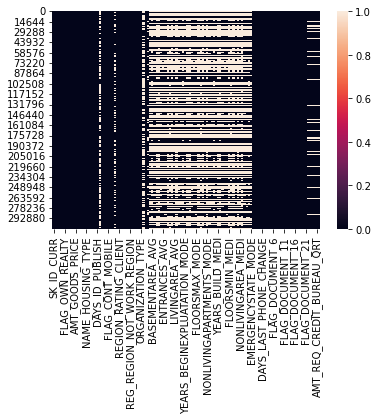

In [12]:
#Data Inspection
sns.heatmap(loan_application_data.isnull())

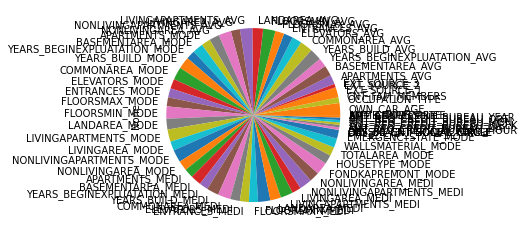

In [13]:
loan_application_data.isnull().sum().plot.pie()
plt.show()

In [14]:
loan_application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Finding the percentage of null values in all the columns of the dataset loan_application_data

In [15]:
#Creating function to find the percentage of null values and arranging them in descending order
def null_values_percent(loan_application_data):
    return round((loan_application_data.isnull().sum()*100/len(loan_application_data)).sort_values(ascending = False),2)

In [16]:
#set the max rows to none
pd.set_option('display.max_rows', None)
#applying the above created function to out dataset
null_values_percent(loan_application_data)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

##### Insights after Identifying Missing Values

It is observed that there are several columns with missing values. There are columns which have around 50% or more missing values.
There are 41 columns that have more than 50 percent missing values. 
With a look at above output we can see that columns having more than 47 percent missing values are average, mode and median columns .
We can ignore these columns for further analysis. We can continue our analysis with rest of columns

In [17]:
#reseting max rows
pd.reset_option("max_rows")

### Treating Missing Values

#### Treating columns values with more or less around 45 percent of data as null 

In [18]:
#Finding the columns which have more than 45 percent missing values

In [19]:
null_values_percent(loan_application_data)[null_values_percent(loan_application_data)>45]

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [20]:
#There are 49 columns that are having more than 45 percent of null values. 
#Hence we will ignore these columns for further analysis.

In [21]:
##we will ignore the 49 columns that are having more than 47 percent of null values 
#and store the cleaned data in loan_application_data_cleaned  .

In [22]:
loan_application_data_cleaned = loan_application_data.loc[:,null_values_percent(loan_application_data)<45]

In [23]:
#Finding the shape after cleaning
loan_application_data_cleaned.shape

(307511, 73)

#### Treating columns with more than 10 percent null values

In [24]:
##columns having more than 10 percent null values
null_values_percent(loan_application_data_cleaned)[null_values_percent(loan_application_data_cleaned)>10]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
dtype: float64

In [25]:
#OCCUPATION_TYPE               31.35
#EXT_SOURCE_3                  19.83
#AMT_REQ_CREDIT_BUREAU_YEAR    13.50
#AMT_REQ_CREDIT_BUREAU_QRT     13.50
#AMT_REQ_CREDIT_BUREAU_MON     13.50
#AMT_REQ_CREDIT_BUREAU_WEEK    13.50
#AMT_REQ_CREDIT_BUREAU_DAY     13.50
#AMT_REQ_CREDIT_BUREAU_HOUR    13.50

Let us analyse and treat these missing values column one by one

#### Column: OCCUPATION_TYPE

In [26]:
loan_application_data_cleaned.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

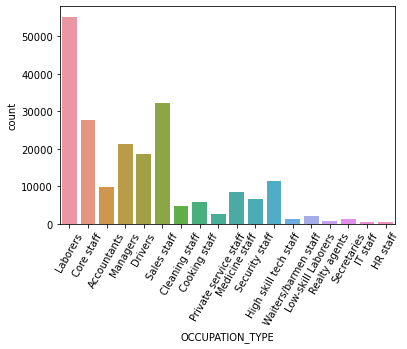

In [27]:
##ploting a count plot for the OCCUPATION_TYPE column just to analyse the proportion 
##This column has 31% missing values which is a huge amount but since this seems to be an important column we cannot drop it
sns.countplot(loan_application_data_cleaned.OCCUPATION_TYPE)
plt.xticks(rotation=60)
plt.show()

Observations
* The column OCCUPATION_TYPE is a categorical column.
* We can replace the missing values with mode value but the mode value is "Laborers" here 
* It doesnot seem very appropriate to fill the missing values of OCCUPATION_TYPE with "Laborers" so we will let the data be as it is.
* For clean data and to avoid any confusion in further analysis we will impute missing values of this column with "Unknown"

In [28]:
#Filling NaN values in OCCUPATION_TYPE with "Unknown"
loan_application_data_cleaned.OCCUPATION_TYPE = loan_application_data_cleaned.OCCUPATION_TYPE.fillna("Unknown")
                                                                                        

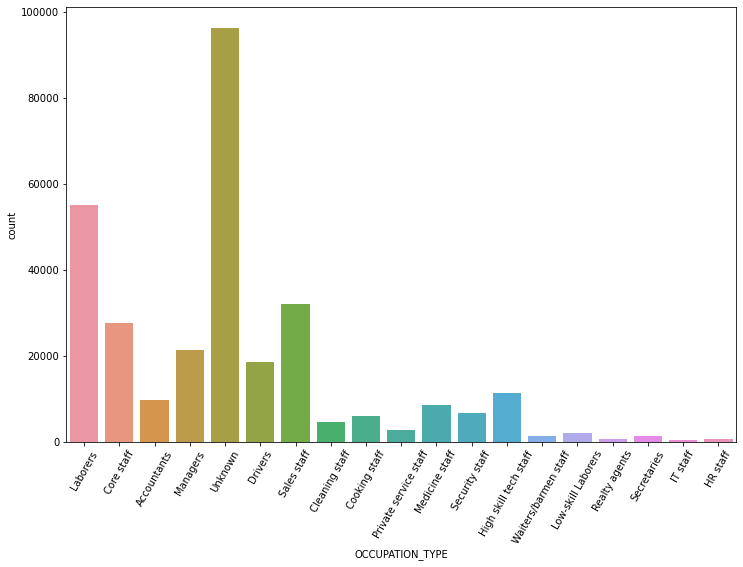

In [29]:
##ploting a count plot for the OCCUPATION_TYPE column just to verify that now a category "Unknown" is added on x axis
plt.figure(figsize = (12,8))
sns.countplot(loan_application_data_cleaned.OCCUPATION_TYPE)
plt.xticks(rotation=60)
plt.show()

Hence we are done with fixing OCCUPATION_TYPE column . Clearly its visible that highest category belongs to "Unknown" and second highest is "Laborers" . Let's proceed with next column.

#### Column: EXT_SOURCE_3 

In [30]:
#EXT_SOURCE_3:Normalized score from external data source

In [31]:
loan_application_data_cleaned.EXT_SOURCE_3.isnull().sum()

60965

In [32]:
(loan_application_data_cleaned.EXT_SOURCE_3.isnull().sum()/len(loan_application_data_cleaned.EXT_SOURCE_3))*100

19.825307062186393

<AxesSubplot:ylabel='Frequency'>

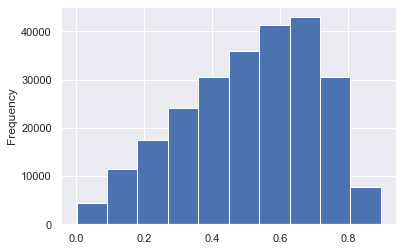

In [33]:
sns.set(color_codes=True)
loan_application_data_cleaned.EXT_SOURCE_3.plot.hist()

In [34]:
loan_application_data_cleaned.EXT_SOURCE_3.median()

0.5352762504724826

In [35]:
loan_application_data_cleaned.EXT_SOURCE_3.mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

In [36]:
loan_application_data_cleaned.EXT_SOURCE_3.mean()

0.5108529061800121

In [37]:
loan_application_data_cleaned.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

Observations
* This is a normally distributed column
* mean value is 0.51 and median value is 0.54 which have less difference
* we can replace the null values with median but since this is not a very important column for our analysis we can ignore it for now.

#### Column:AMT_REQ_CREDIT_BUREAU_YEAR 


* AMT_REQ_CREDIT_BUREAU_YEAR:Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [38]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

In [39]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [40]:
unique_val = len(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
unique_val


26

In [41]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

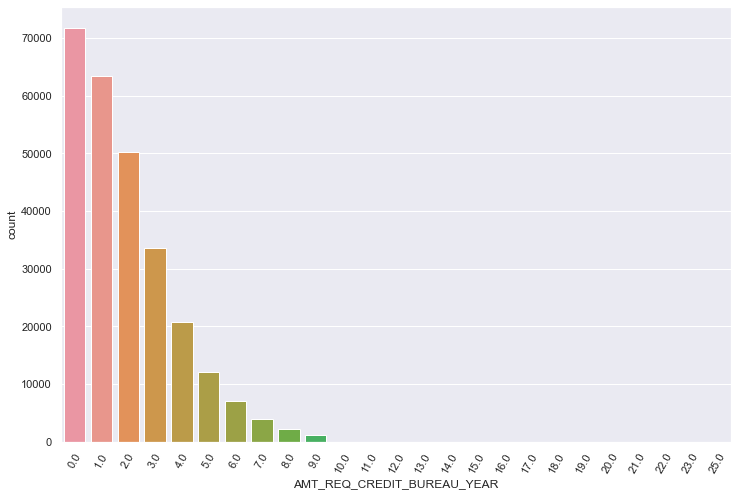

In [42]:
plt.figure(figsize = (12,8))
sns.countplot(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.xticks(rotation=60)
plt.show()

In [43]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [44]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

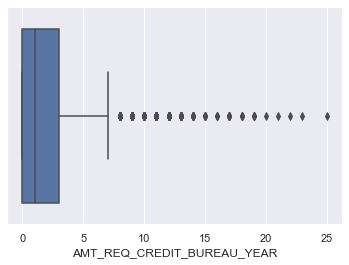

In [45]:
sns.boxplot(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR)

In [46]:
#From the boxplot of loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR is it observed that there exists outliers . 
#Hence we will replace missing values with median. 
#The above column represent number of enquries made for the customer(which should be discrete and not continous)
#Also from the count plot it can be observed that mode value is 0.0 and the second highest is 1.0(which is the median)

In [47]:
#Filling null values with median


In [48]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace = True)

In [49]:
#checking for null values just to verify
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

Hence we are done with AMT_REQ_CREDIT_BUREAU_YEAR . Proceeding further with next column.

#### Column: AMT_REQ_CREDIT_BUREAU_QRT

In [50]:
##AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)


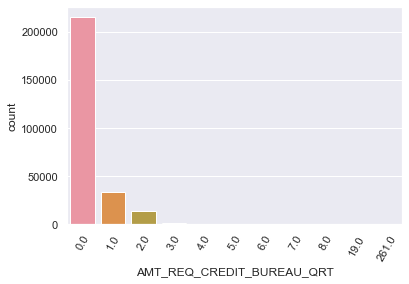

In [51]:
#plt.figure(figsize = (12,8))
sns.countplot(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT)
plt.xticks(rotation=60)
plt.show()

In [52]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [53]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [54]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.median()

0.0

In [55]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Observation
* It can be observed from the above plot that a vast percentage of values are 0 (which is median as well as mode for the above column)
* Hence we can safely impute the null values with the same(median or mode)

In [56]:
#Filling NAN values with median
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace = True)

In [57]:
#checking for null values just to verify
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0


Hence we are done with AMT_REQ_CREDIT_BUREAU_QRT . Proceeding further with next column.

#### Column: AMT_REQ_CREDIT_BUREAU_MON

In [58]:
##AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)


In [59]:
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_MON.unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

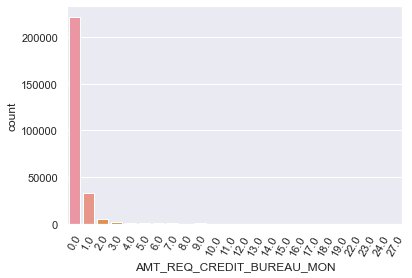

In [60]:
sns.countplot(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_MON)
plt.xticks(rotation=60)
plt.show()

* Again we can observe that most of the values are 0.0 . Hence we can either impute the median value or we can ignore the column for analysis since there is not much variation.



In [61]:
#imputing null values with median for data cleaning purposes
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_MON.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace = True)

Proceeding with next columns.

#### Column: AMT_REQ_CREDIT_BUREAU_WEEK


#### Column : AMT_REQ_CREDIT_BUREAU_DAY  
 

#### Column : AMT_REQ_CREDIT_BUREAU_HOUR

After observing the analysis of above 3 columns , it can be concluded that these columns do not have much variations. 
Trying to analyse the rest 3 together.

In [62]:
##AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application
##AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
##AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)


AMT_REQ_CREDIT_BUREAU_WEEK


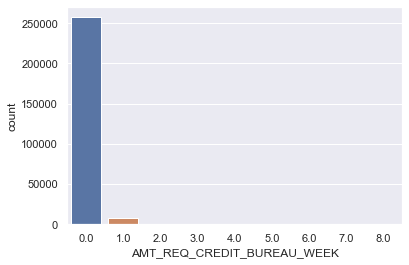

AMT_REQ_CREDIT_BUREAU_DAY


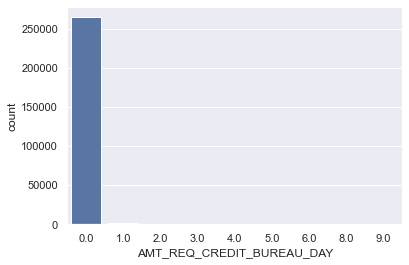

AMT_REQ_CREDIT_BUREAU_HOUR


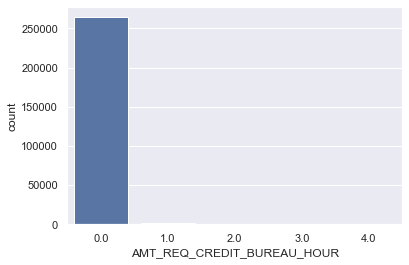

In [63]:
var = ["AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
for i in var:
    print(i)
    sns.countplot(loan_application_data_cleaned[i])
    plt.show()

In [64]:
#imputing null values with mode for data cleaning purposes
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_WEEK.mode(),inplace = True)
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_DAY.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_DAY.mode(),inplace = True)
loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(loan_application_data_cleaned.AMT_REQ_CREDIT_BUREAU_HOUR.mode(),inplace = True)

It can be observed from the above 3 plots that all the three columns ["AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"] 
do not have much variations.We have filled the NAN values with mode values.

### Observations after treating missing values

* we have dropped the columns having more than 47% values as null
* columns having null values more than 30% but less than 47% .
   *  we have filled the null value with "Unknown" in OCCUPATION_TYPE column
* columns having null values more than 10% but less than 30%
   *  Based on our observation most of such columns do not have much variation in values hence they would not be much relevant for Target. We have filled NAN with respective median and mode.
    data analysis.
* columns having null values less than 1 %
    The null value percentage is very less . hence we are ignoring it for now.

### Standardizing Dataset


We can see from dataset that there are few negative values in columns DAYS_BIRTH and DAYS_EMPLOYED which seem absurd .
Hence we can treat those values. Also for clarity purposes if would be better if we convert DAYS_BIRTH to AGE in years 
and DAYS_EMPLOYED to YEARS EMPLOYED.

#### DAYS_BIRTH

In [65]:
##DAYS_BIRTH	Client's age in days at the time of application	time only relative to the application
##Here the DAYS_BIRTH data is in negative since it's calculating in reverse with respect to date of application to the current date

In [66]:
loan_application_data_cleaned.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [67]:
#Here we are using abs() function to convert negative days value to positive
loan_application_data_cleaned.DAYS_BIRTH = abs(loan_application_data_cleaned.DAYS_BIRTH)
loan_application_data_cleaned.DAYS_BIRTH.head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [68]:
#Dataset would be more readable if we convert days to years. 
#Creating a new column Age---> Age in years
#round off values to a whole number for better understanding
loan_application_data_cleaned.AGE = round(loan_application_data_cleaned.DAYS_BIRTH/365,0)
loan_application_data_cleaned.AGE.head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [69]:
loan_application_data_cleaned.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### DAYS_EMPLOYED

In [70]:
##DAYS_EMPLOYED	How many days before the application the person started current employment	time only relative to the application


In [71]:
loan_application_data_cleaned.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Observation
* here we can see that max value is 365243 days = 976 years of employment which is not possible hence it is an incorrect value.

In [72]:
#Here we are using abs() function to convert negative days value to positive
loan_application_data_cleaned.DAYS_EMPLOYED = abs(loan_application_data_cleaned.DAYS_EMPLOYED)
loan_application_data_cleaned.DAYS_EMPLOYED.head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [73]:
#Dataset would be more readable if we convert days to years. 
#Creating a new column Employment_AGE---> Age in years

loan_application_data_cleaned.Employment_AGE = round(loan_application_data_cleaned.DAYS_EMPLOYED/365,0)
loan_application_data_cleaned.Employment_AGE.head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE

In [74]:
##as operation done for above columns we will convert DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE columns to abs values

In [75]:
loan_application_data_cleaned.DAYS_REGISTRATION = abs(loan_application_data_cleaned.DAYS_REGISTRATION)
loan_application_data_cleaned.DAYS_ID_PUBLISH = abs(loan_application_data_cleaned.DAYS_ID_PUBLISH)
loan_application_data_cleaned.DAYS_LAST_PHONE_CHANGE = abs(loan_application_data_cleaned.DAYS_LAST_PHONE_CHANGE)

In [76]:
loan_application_data_cleaned.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              307511.000000   
mean                     0.034362                   0.231293   
std                      0.204685                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307511.000000               307511.000000  
mean                    0.229631                    1.778463  
std                     0.744059                    1.765523  
min                     0.000000                    0.000000  
25%              

In [77]:
loan_application_data_cleaned.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [78]:
loan_application_data_cleaned.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [79]:
#here we can observe that 4 values in gender column are XNA , we can replace then with mode value
loan_application_data_cleaned.CODE_GENDER = loan_application_data_cleaned.CODE_GENDER.replace("XNA","F")

In [80]:
loan_application_data_cleaned.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Hence we have converted all the negative day values to positive in the dataset and we have replace 4 junk values in GENDER column to F.

In [81]:
loan_application_data_cleaned.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

#### Creating bins for these columns

In [82]:
#These three columns have very high values ,we can convert it to lakhs and create bins for better understanding

# Converting AMT_INCOME_TOTAL into lakhs for better readability
loan_application_data_cleaned['AMT_INCOME_TOTAL']=loan_application_data_cleaned['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
Range = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

loan_application_data_cleaned['AMT_INCOME_RANGE']=pd.cut(loan_application_data_cleaned['AMT_INCOME_TOTAL'],bins,labels=Range)


In [83]:
loan_application_data_cleaned["AMT_INCOME_RANGE"].value_counts()

1L-2L        155898
2L-3L         65176
0-1L          63698
3L-4L         14676
4L-5L          5361
5L-6L          1095
6L-7L           869
8L-9L           298
7L-8L           162
9L-10L           28
10L Above        18
Name: AMT_INCOME_RANGE, dtype: int64

In [84]:
loan_application_data_cleaned['AMT_CREDIT']=loan_application_data_cleaned['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
Range = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

loan_application_data_cleaned['AMT_CREDIT_RANGE']=pd.cut(loan_application_data_cleaned['AMT_CREDIT'],bins,labels=Range)


In [85]:
loan_application_data_cleaned["AMT_CREDIT_RANGE"].value_counts()

2L-3L        54813
5L-6L        34232
4L-5L        32038
1L-2L        30140
3L-4L        26338
6L-7L        24049
8L-9L        21792
7L-8L        19193
10L Above    13422
9L-10L        8927
0-1L          6004
Name: AMT_CREDIT_RANGE, dtype: int64

In [86]:
loan_application_data_cleaned['AMT_GOODS_PRICE']=loan_application_data_cleaned['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
Range = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

loan_application_data_cleaned['AMT_GOODS_PRICE_RANGE']=pd.cut(loan_application_data_cleaned['AMT_GOODS_PRICE'],bins,labels=Range)

In [87]:
loan_application_data_cleaned["AMT_GOODS_PRICE_RANGE"].value_counts()

2L-3L        62761
4L-5L        56973
6L-7L        40024
1L-2L        32956
8L-9L        21484
3L-4L        21219
5L-6L        13117
0-1L          8709
7L-8L         8110
9L-10L        7761
10L Above     3512
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

### Identifying Outliers

In [88]:
loan_application_data_cleaned.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000  307499.000000    307233.000000   
mean        5.990260   27108.573909         5.383962   
std         4.024908   14493.737315         3.694465   
min         0.450000    1615.500000         0.405000   
25%         2.700000   16524.000000         2.385000   
50%         5.135310   24903.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  258025.500000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              307511.000000   
mean                     0.034362                   0.231293   
std                      0.204685                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307511.000000               307511.000000  
mean                    0.229631                    1.778463  
std                     0.744059                    1.765523  
min                     0.000000                    0.000000  
25%     

It is clearly visible that the data is more readable now.

We can see that columns having vast difference between 75 percentile value and max value possibly have outliers present.
Let us analyse such columns.

In [89]:
#Viewing the output of describe function we suspect few columns to have Outliers present 
#["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_ANNUITY",
 #               "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]
#There are few other columns having high differences like AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON etc
#but since we have analysed them before and we found no considerable variation in those values , they were more or less contant
#Hence we will ignore those columns for analysis purposes

In [90]:
#Let us store the columns to be analysed in a list Outliers_analysed
Outliers_analysed = ["CNT_CHILDREN","AMT_INCOME_TOTAL",  "AMT_ANNUITY",
                "DAYS_EMPLOYED", "DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE"]

CNT_CHILDREN


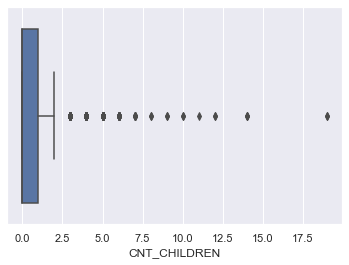

AMT_INCOME_TOTAL


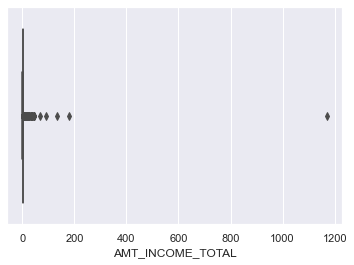

AMT_ANNUITY


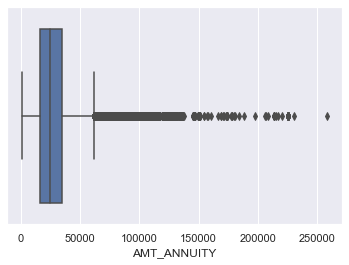

DAYS_EMPLOYED


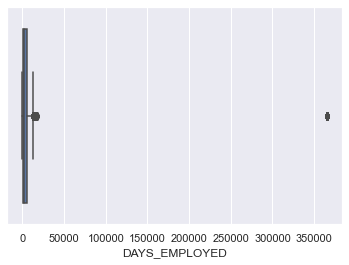

DAYS_REGISTRATION


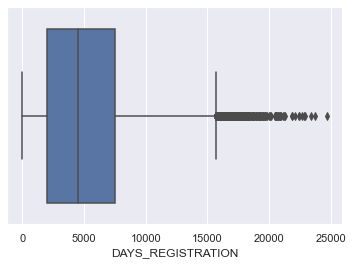

DAYS_LAST_PHONE_CHANGE


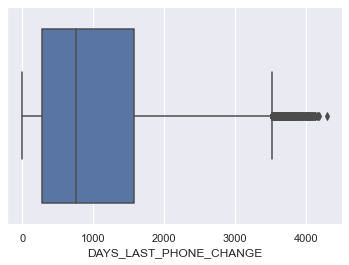

In [91]:
for i in Outliers_analysed:
    print(i)
    sns.boxplot(loan_application_data_cleaned[i])
    plt.show()

Observations
* Column DAYS_EMPLOYED has few outliers at around >350000 days which is not a correct value as it it equivalent to 976 years of employment.
* Column AMT_INCOME_TOTAL has few outliers but few values are very high implying few of the loan applicants have very high income compared to others.
* Column CNT_CHILDREN has few values about and more than 10 implying some of the loan applicants have more than 10 children which is more than normal.
* All the columns in Outliers_analysed list have outliers present.


### Analysing the Data Imbalance

#### Column : TARGET

In [92]:
##TARGET	Target variable 
#(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
 #0 - all other cases)


In [93]:
##Let us plot pieplot for column TARGET to get an overview
##loan_application_data_cleaned.TARGET.plot.pie()
##plt.show()

In [94]:
##total clients available
loan_application_data_cleaned.TARGET.count()

307511

In [95]:
#Percentage of clients with payment difficulties
print("Percentage of clients with payment difficulties : ",
      (100*(loan_application_data_cleaned.TARGET.value_counts()[1]/loan_application_data_cleaned.TARGET.count())))
#Percentage of clients with all other cases
print("Percentage of clients with all other cases : ",
      (100*(loan_application_data_cleaned.TARGET.value_counts()[0]/loan_application_data_cleaned.TARGET.count())))

Percentage of clients with payment difficulties :  8.072881945686495
Percentage of clients with all other cases :  91.92711805431351


In [96]:
##For easy data handling purposes assigning clients with payment difficulties as Defaulters and  clients with all other cases as Others
Defaulters = 100*(loan_application_data_cleaned.TARGET.value_counts()[1]/loan_application_data_cleaned.TARGET.count())
Others = 100*(loan_application_data_cleaned.TARGET.value_counts()[0]/loan_application_data_cleaned.TARGET.count())
##Data Imbalance
print("Data Imbalance = " ,Others/Defaulters)

Data Imbalance =  11.387150050352469


Hence we can see that Data Imbalance for TARGET column is about 11.38 percent.

Now let us proceed with Univariate and Bivariate Analysis.

### Data Analysis

#### Segregating Categorical and Numerical Columns

In [97]:
#we first need to segregate which columns are numerical and which are categorical
#checking dtype
loan_application_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [98]:
#set the max rows to none
pd.set_option('display.max_rows', None)
#finding number of unique values in each column
loan_application_data_cleaned.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

Observation
* Columns having 2-30 values are mostly categorical columns
* Columns having vast amount of unique values are numerical columns
* Also columns with dtype as int and float are numerical and object type are categorical
* we can observe that TARGET column is int type since it has values has 1 and 0 but it is a categorical column

In [99]:
#Converting dtype of AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_RANGE column to float64
#loan_application_data_cleaned.AMT_CREDIT = loan_application_data_cleaned.AMT_CREDIT.astype(float64)
#loan_application_data_cleaned.AMT_GOODS_PRICE = loan_application_data_cleaned.AMT_GOODS_PRICE.astype(float64)
#loan_application_data_cleaned.AMT_GOODS_PRICE = loan_application_data_cleaned.AMT_GOODS_PRICE.astype(float64)

In [100]:
loan_application_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

#We can observe that dtype of TARGET column is now object.

In [101]:
Categorical = loan_application_data_cleaned.select_dtypes(include=['object']).columns
Numerical = loan_application_data_cleaned.select_dtypes(include=['int64','float64']).columns
Bucketed = loan_application_data_cleaned.select_dtypes(include=['category']).columns

In [102]:
Categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [103]:
Numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [104]:
Bucketed

Index(['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE'], dtype='object')

Hence we have segregated columns into Categorical and Numerical .

### Univariate Analysis--Categorical Data

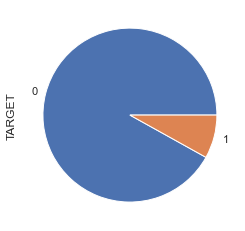

In [105]:
##Let us plot pieplot for column TARGET to get an overview
loan_application_data_cleaned.TARGET.value_counts().plot.pie()
plt.show()

From the previous analysis we know that data imbalance here is around 11.38%

#### Separating TARGET values into Defaulters and Other_clients 

In [106]:
##Separating TARGET values into Defaulters and Other_clients 
Other_clients = loan_application_data_cleaned.loc[loan_application_data_cleaned['TARGET'] == 0]
Defaulters = loan_application_data_cleaned.loc[loan_application_data_cleaned['TARGET'] == 1]

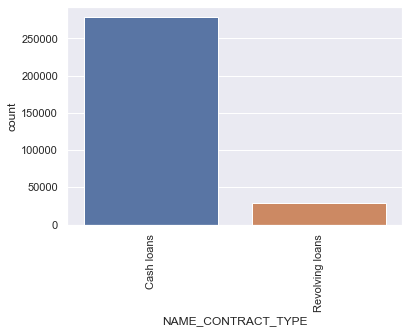

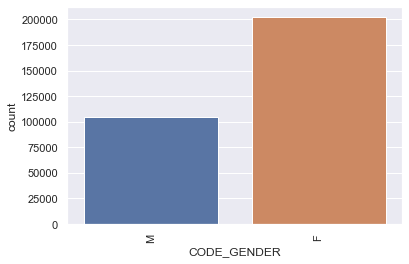

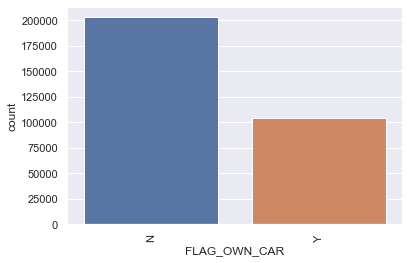

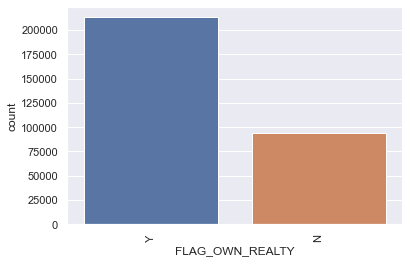

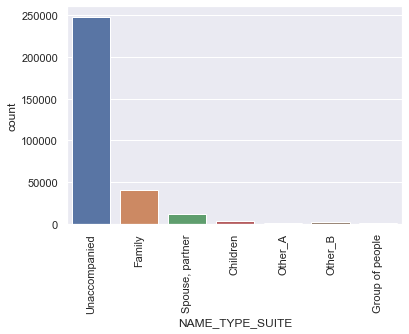

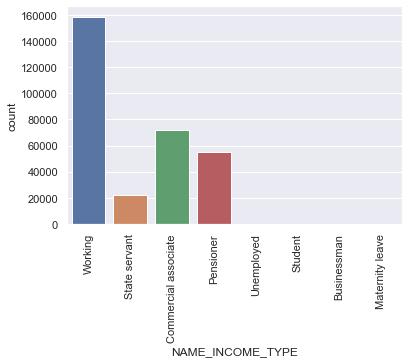

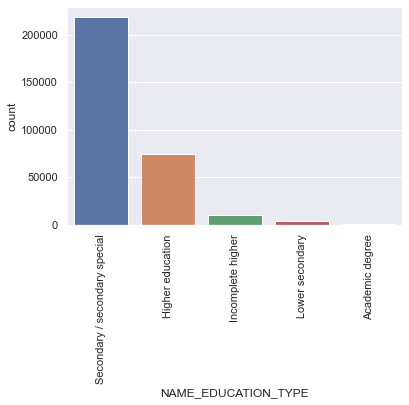

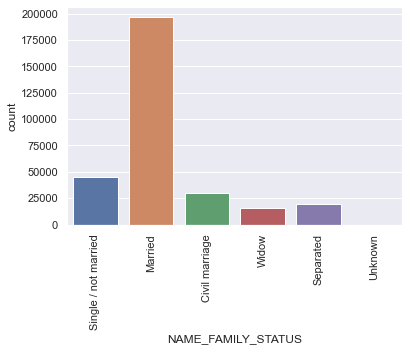

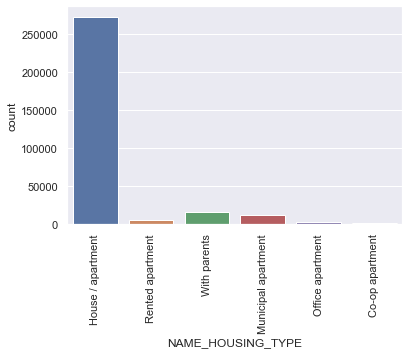

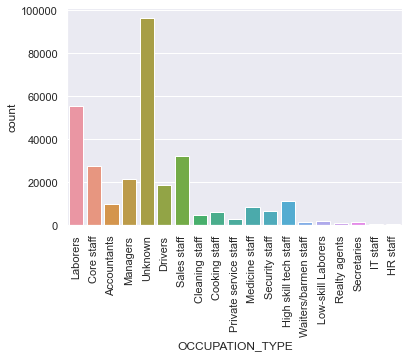

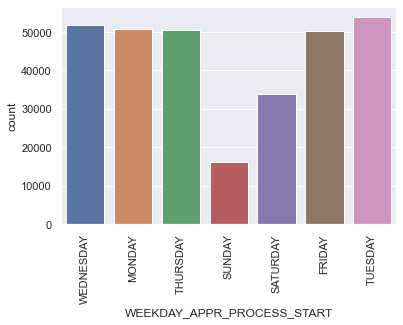

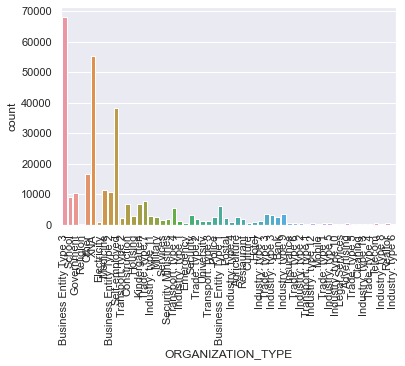

In [107]:
##plotting graphs for Categorical Columns
##plotting with respect to total applicants
for i in Categorical:
    sns.countplot( loan_application_data_cleaned[i] )
    plt.xticks(rotation=90)
    plt.show()

In [108]:
#we can see few columns give important feedbacks .
#we can normalize their values to get a overview of the percentage

In [109]:
 loan_application_data_cleaned.TARGET.value_counts(normalize = True)
    

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [110]:
loan_application_data_cleaned.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [111]:
loan_application_data_cleaned.CODE_GENDER.value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

In [112]:

loan_application_data_cleaned.NAME_INCOME_TYPE.value_counts(normalize = True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [113]:
loan_application_data_cleaned.OCCUPATION_TYPE.value_counts(normalize = True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [114]:
loan_application_data_cleaned.NAME_EDUCATION_TYPE.value_counts(normalize = True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [115]:

loan_application_data_cleaned.NAME_FAMILY_STATUS.value_counts(normalize = True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

   Observations:
1. TARGET : 8% clients are defaulters and 91% pay back the loans
2. NAME_CONTRACT_TYPE: Cash loan applications(90%) are far more than revolving loan applications(9%).
3. CODE_GENDER : Female applicants(66%) are far more than male applicants(34%). 
4. NAME_INCOME_TYPE: 51% of the applications are from working income types   
5. OCCUPATION_TYPE: Occupation of 31% of the loan applicants are unknown(which may result as defaulters , we will analyse           that further)
6. NAME_EDUCATION_TYPE: 71% of the applications belong to Secondary educated sector. 
7. NAME_FAMILY_STATUS: 63% of the applicants are married and 14 % are single and 9.6 % are civil married.

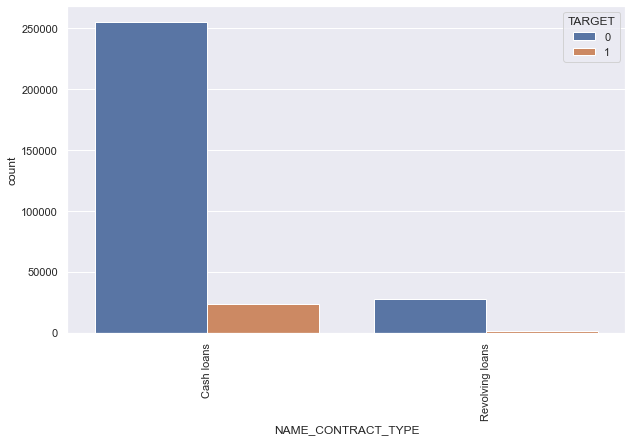

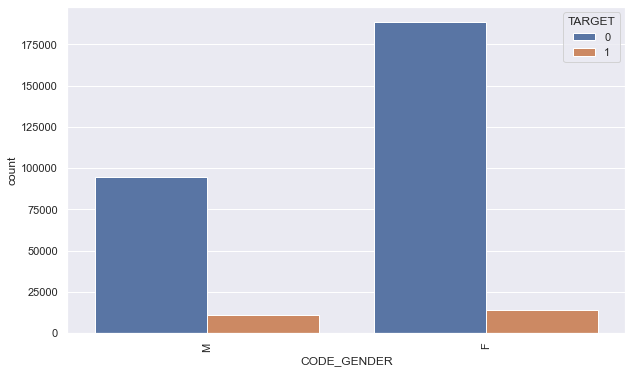

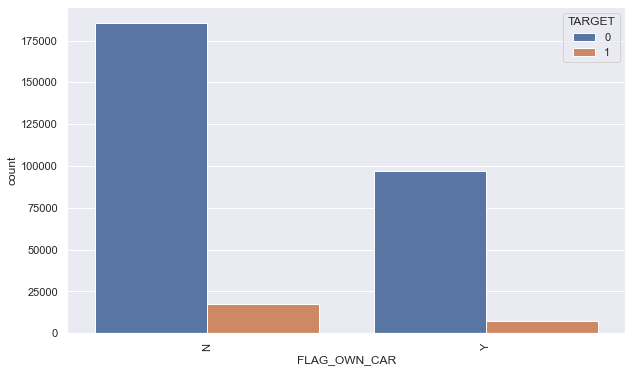

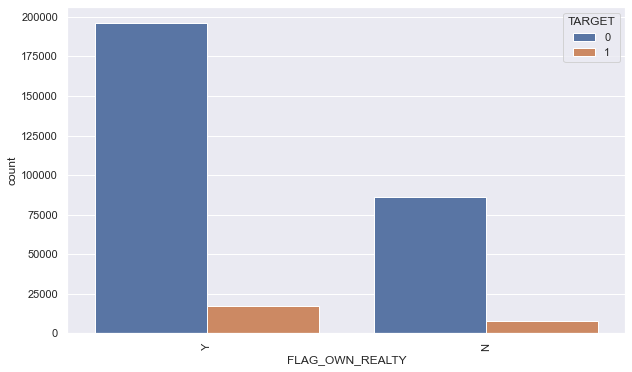

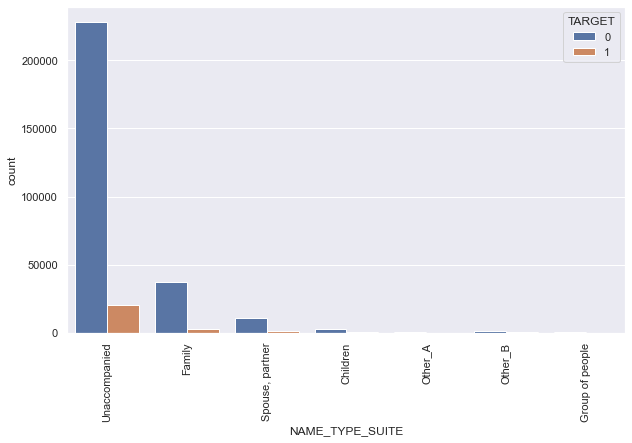

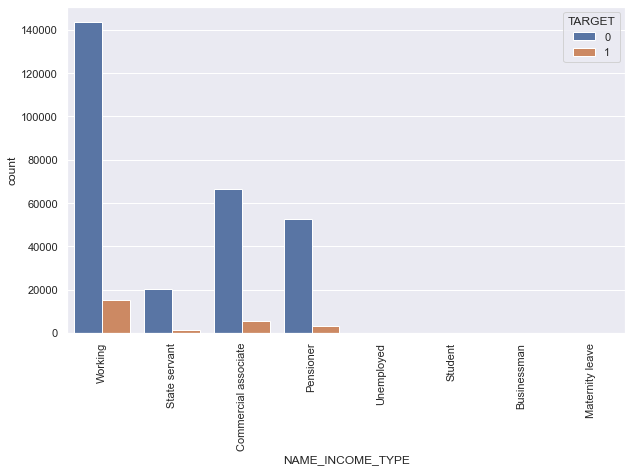

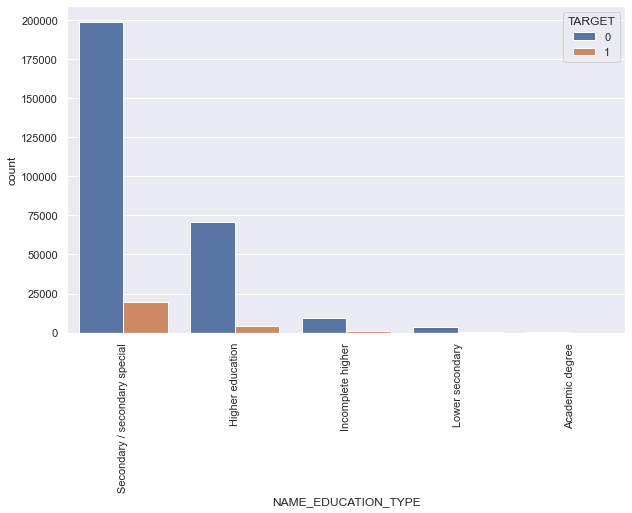

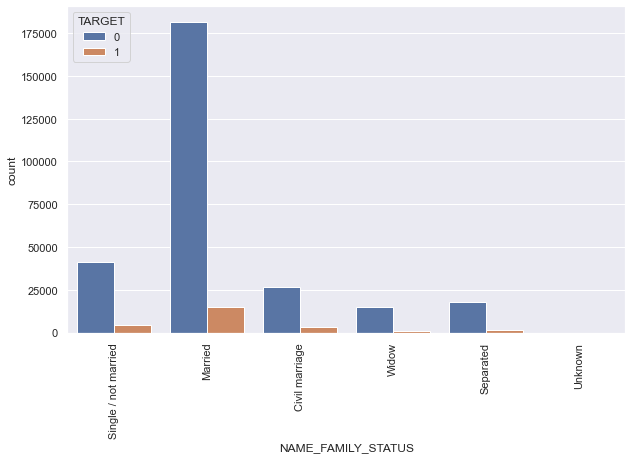

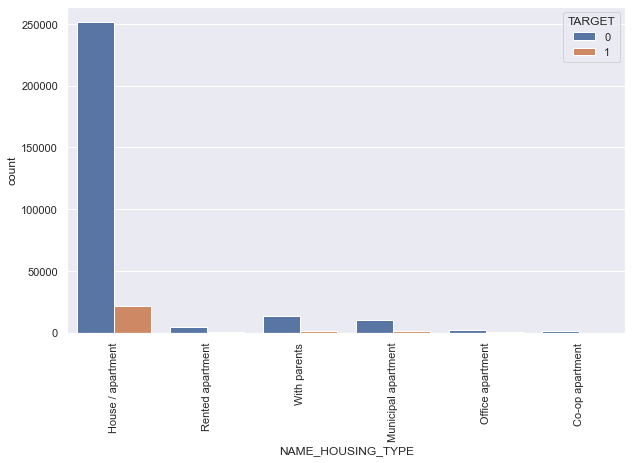

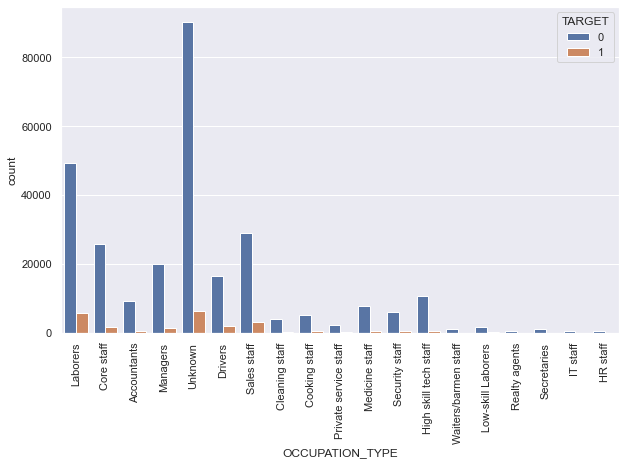

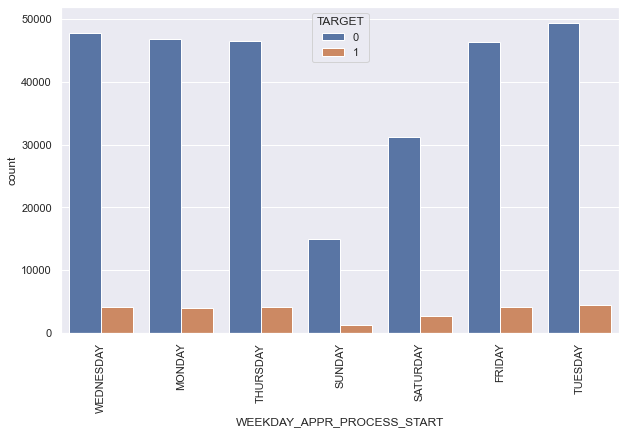

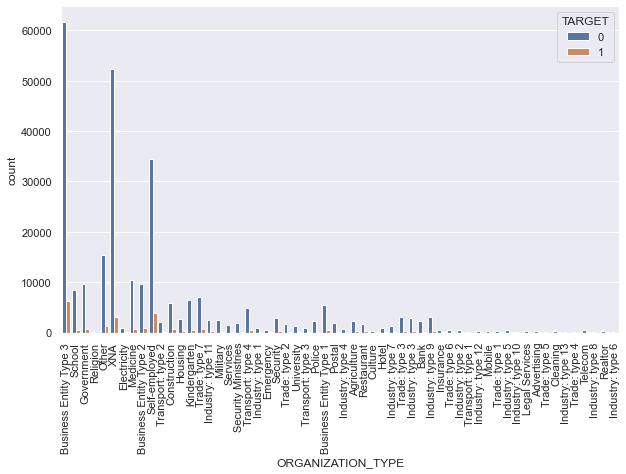

In [210]:
#plotting with hue = TARGET implying we can compare between the defaulter clients and the other all clients
#1---> defaulters
#0---->other clients
for i in Categorical:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i , data = loan_application_data_cleaned , hue = 'TARGET' )
    
    plt.xticks(rotation=90)
    plt.show()

#### Analysing on the basis of GENDER

In [117]:
#percentage female defauters and percent male defaulters
per_F_def = len(Defaulters.CODE_GENDER[(Defaulters['CODE_GENDER']=="F")])/len(loan_application_data_cleaned.CODE_GENDER[(loan_application_data_cleaned["CODE_GENDER"]=="F")])
per_M_def = len(Defaulters.CODE_GENDER[(Defaulters['CODE_GENDER']=="M")])/len(loan_application_data_cleaned.CODE_GENDER[(loan_application_data_cleaned["CODE_GENDER"]=="M")])

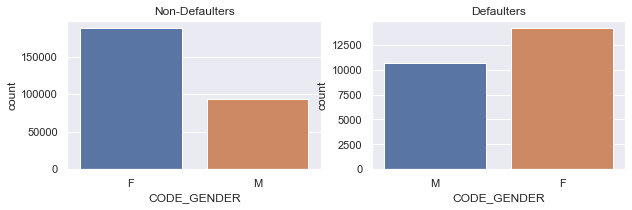

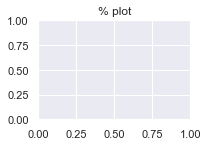

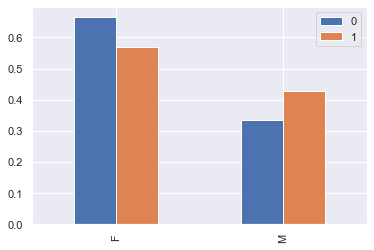

In [118]:

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='CODE_GENDER',data=Other_clients)

plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='CODE_GENDER',data=Defaulters)
plt.show()

plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.CODE_GENDER.value_counts())/len(Other_clients))
df['1']= ((Defaulters.CODE_GENDER.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

In [119]:
print("% female defaulters:",per_F_def )
print("% male defaulters:",per_M_def )

% female defaulters: 0.06999189931440539
% male defaulters: 0.1014192025433328


Observation:
1. We can see that Females are comparitively high applicants for loans but male(10%) applicants have high chances of defaulting loans than females(6%).

##### Analysing on the basis of  NAME_FAMILY_STATUS

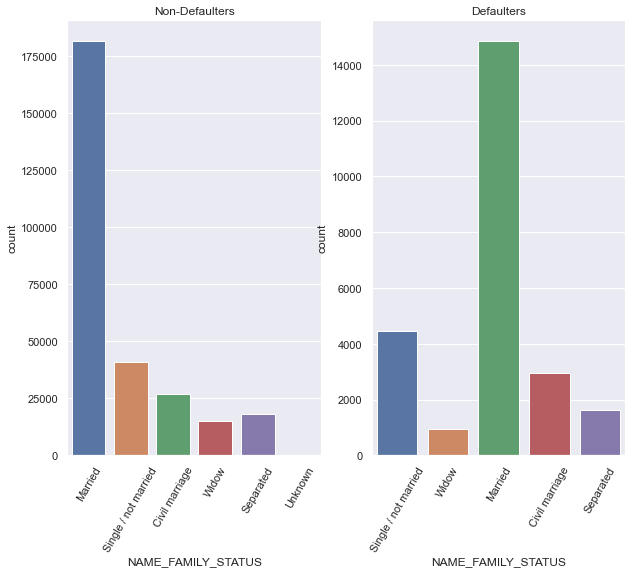

In [120]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',data=Defaulters)
plt.xticks(rotation=60)
plt.show()


Observation:
* Married people are having high number of defaulters but the applications are also high , thus the percentage defaulter in this section is less.
* It seems %age of defaulters are more in civil marriage.

#### Analysing on the basis of EDUCATION TYPE

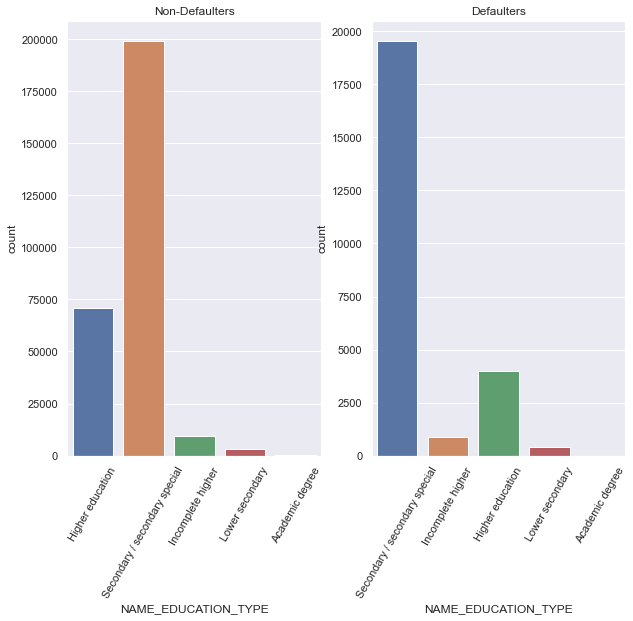

In [121]:

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Defaulters)
plt.xticks(rotation=60)
plt.show()


Observation:
*   Most of the loan applicants belong to Secondary Education Sector 
    but the defaulter percentage is greater among Lower seconday education typr applicants.

#### Analysing on the basis of NAME_HOUSING_TYPE

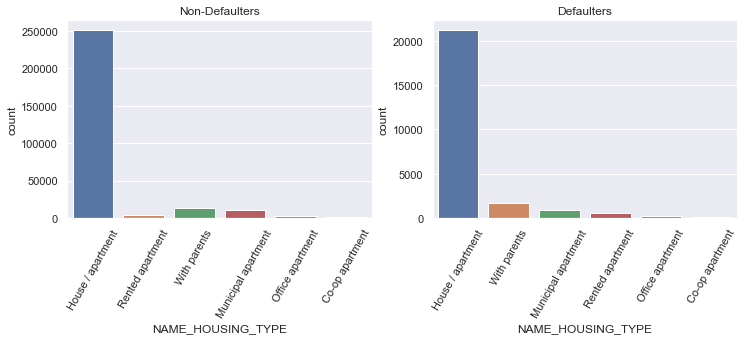

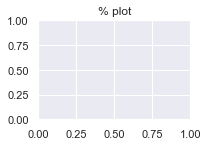

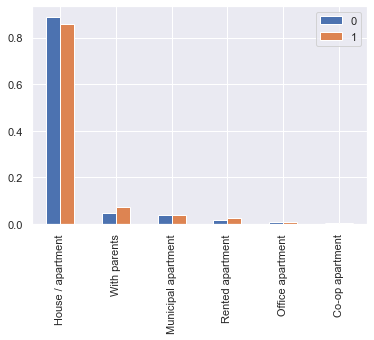

In [122]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_HOUSING_TYPE',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_HOUSING_TYPE',data=Defaulters)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.NAME_HOUSING_TYPE.value_counts())/len(Other_clients))
df['1']= ((Defaulters.NAME_HOUSING_TYPE.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

Observation:
* Most of the clients belong to House/Apartment Category but defaulter percentage is more amoung who live with parents and rented apartments.   

#### Analysing on the basis of CONTRACT_TYPE

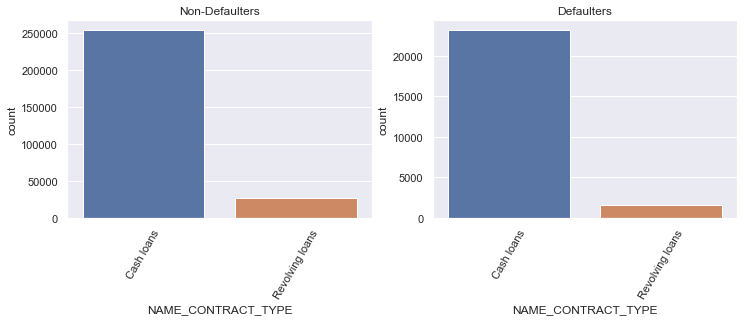

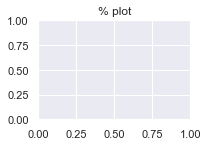

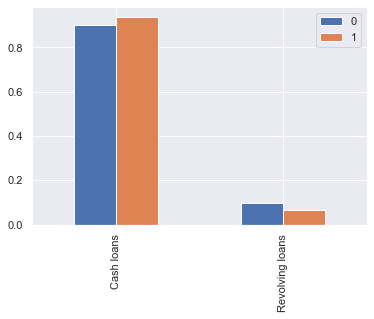

In [123]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=Defaulters)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.NAME_CONTRACT_TYPE.value_counts())/len(Other_clients))
df['1']= ((Defaulters.NAME_CONTRACT_TYPE.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

Observation:
* Revolving loan cliets are comparitively less to Cash loans. Not much can be infered about defaulters.

#### Analysing on the basis of FLAG_OWN_CAR

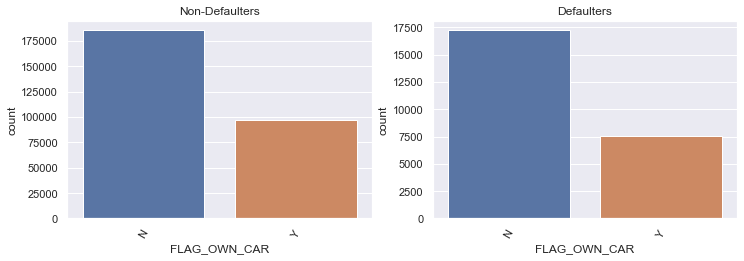

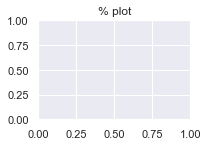

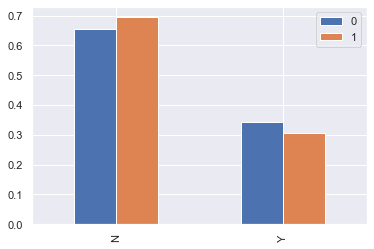

In [124]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='FLAG_OWN_CAR',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_CAR',data=Defaulters)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.FLAG_OWN_CAR.value_counts())/len(Other_clients))
df['1']= ((Defaulters.FLAG_OWN_CAR.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

Observation:
*    Most of the clients who do not own car are the applicants.

#### Analysing on the basis of FLAG_OWN_REALTY

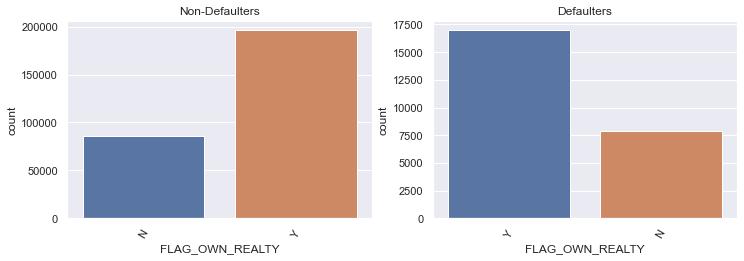

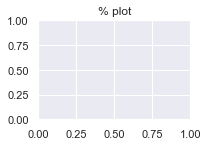

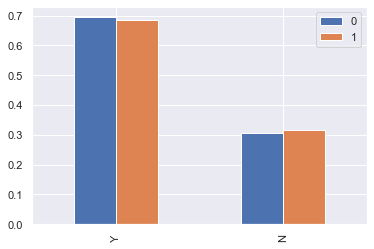

In [125]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='FLAG_OWN_REALTY',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_REALTY',data=Defaulters)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.FLAG_OWN_REALTY.value_counts())/len(Other_clients))
df['1']= ((Defaulters.FLAG_OWN_REALTY.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

Observation:
* There doesnot seem to be any particular relation amoung the defaulters and owning the reality.
Except that a large number of clients own the reality.

#### Analysing on the basis of NAME_INCOME_TYPE

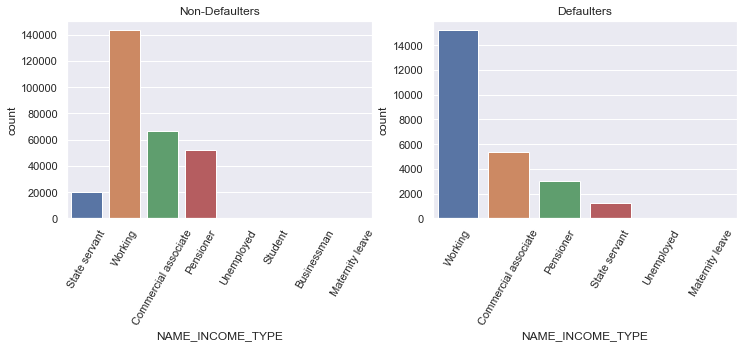

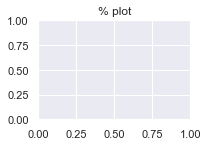

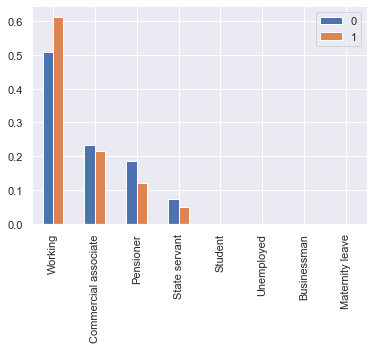

In [126]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_INCOME_TYPE',data=Other_clients)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_INCOME_TYPE',data=Defaulters)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients.NAME_INCOME_TYPE.value_counts())/len(Other_clients))
df['1']= ((Defaulters.NAME_INCOME_TYPE.value_counts())/len(Defaulters))
df.plot.bar()
plt.show()

Observation:
*    Clients those applied for loans belong to Working and Commercial associates mostly though they have a comparitivily high         defaulters too.
*    Student and Businessmen seem to have almost zero defaulters. This bunch seem to be safe for lending loans.

### Univariate Analysis---Numerical Data

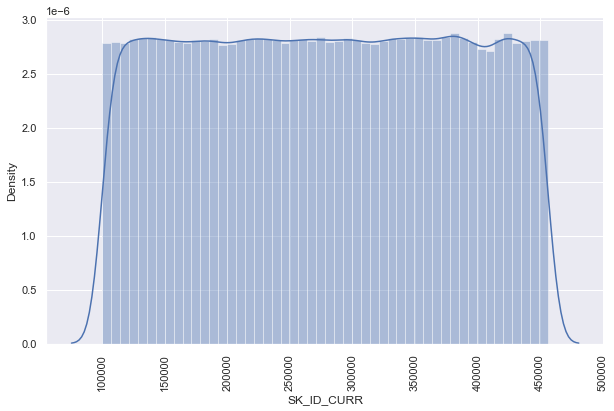

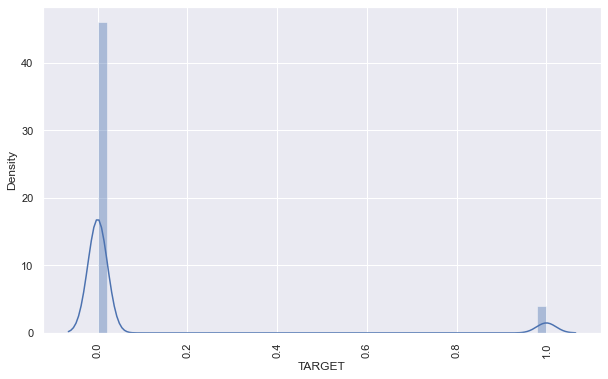

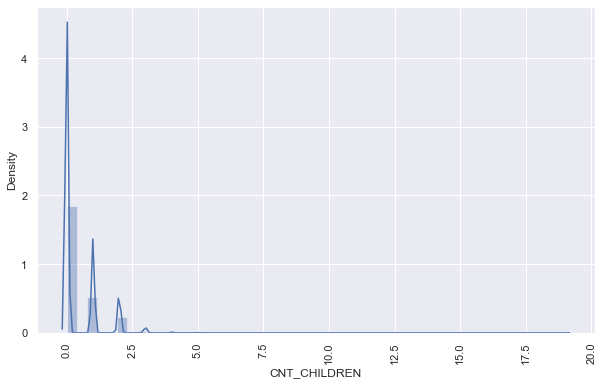

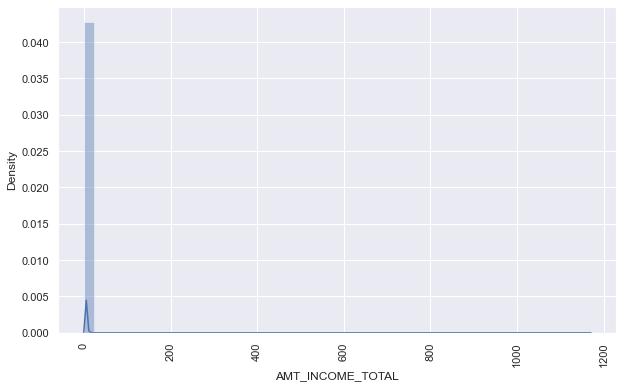

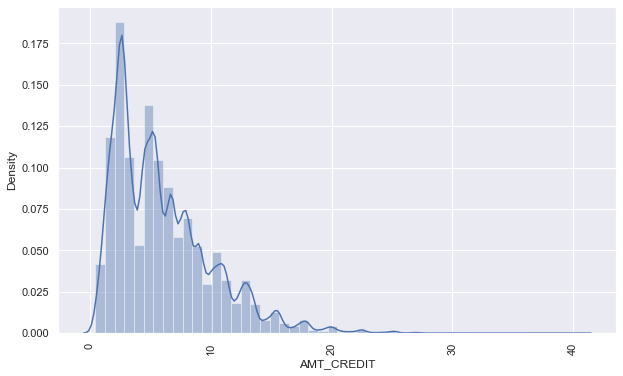

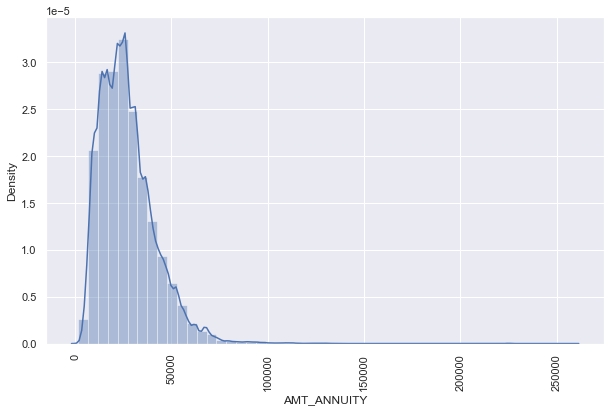

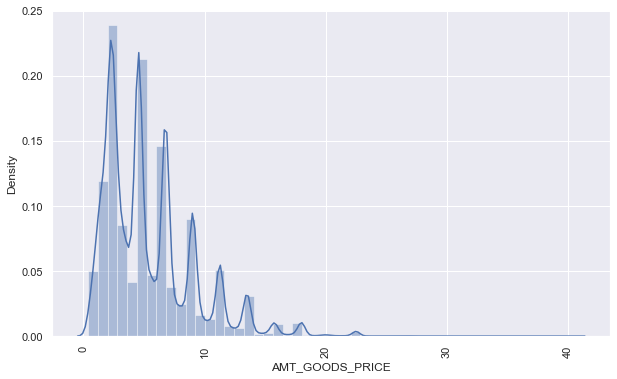

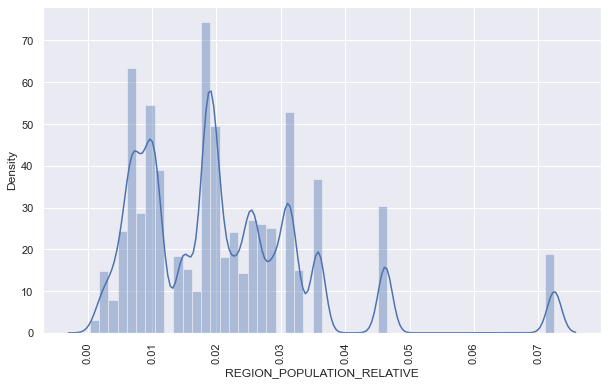

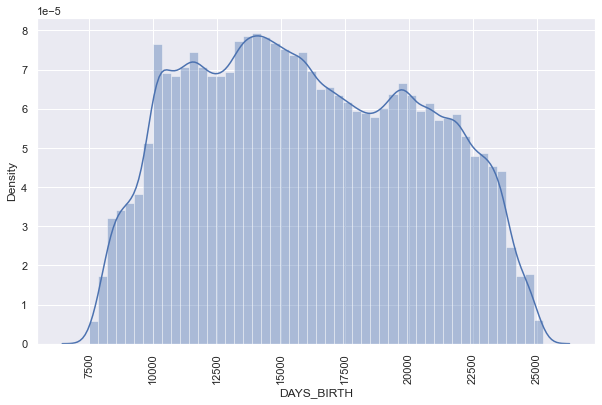

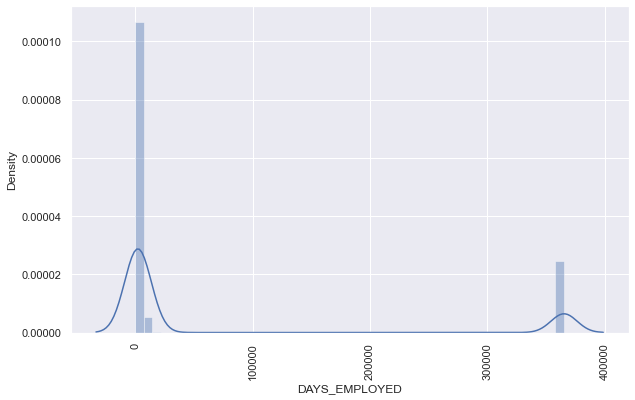

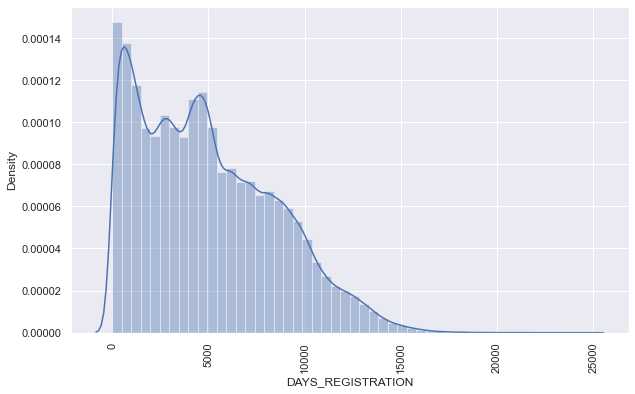

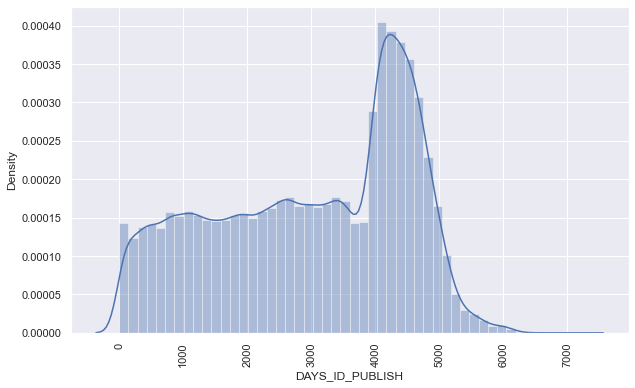

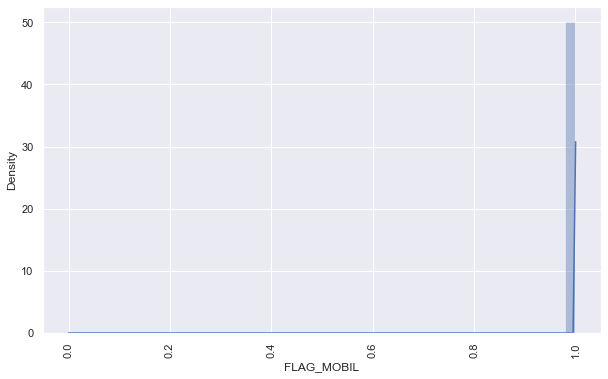

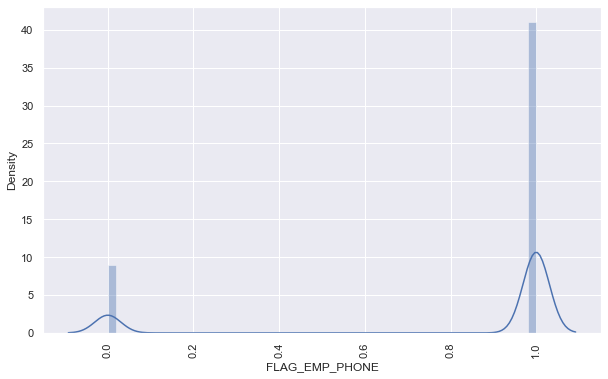

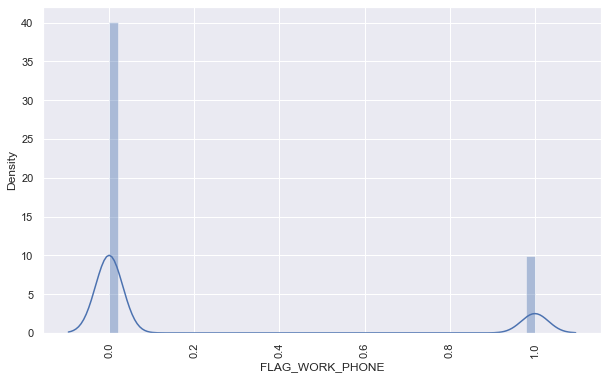

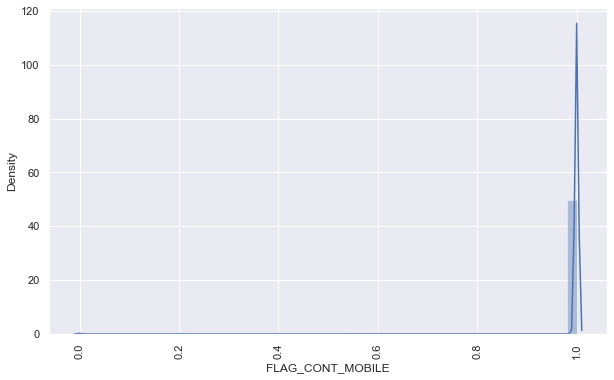

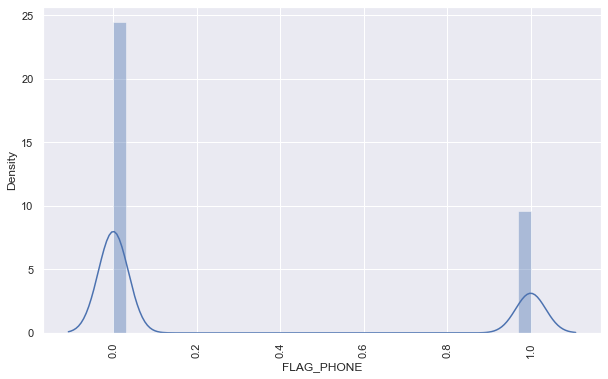

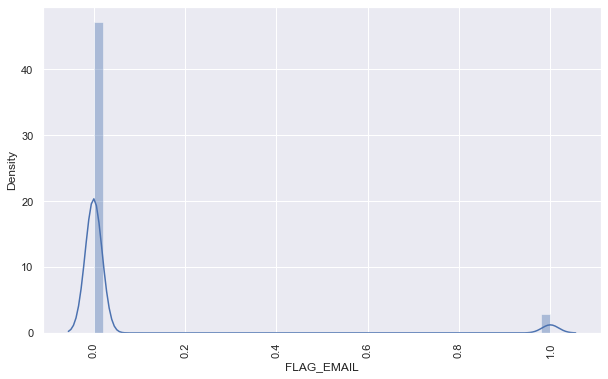

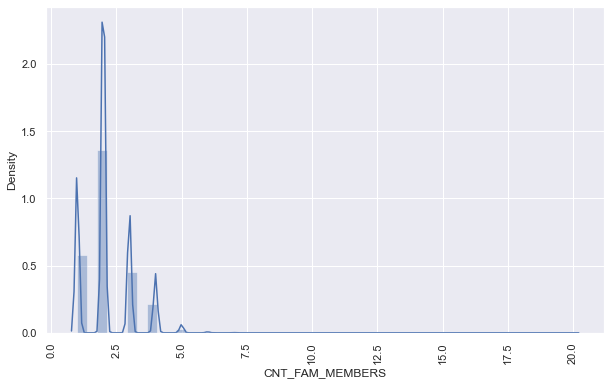

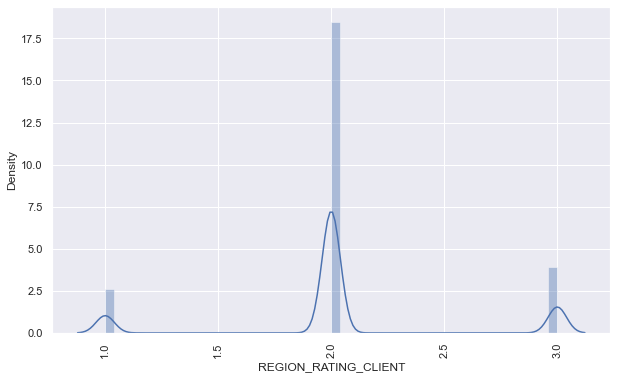

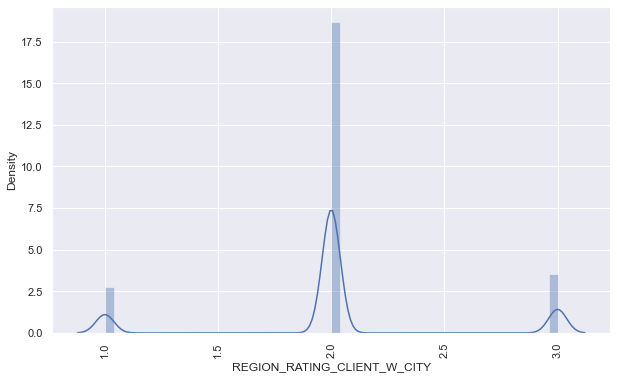

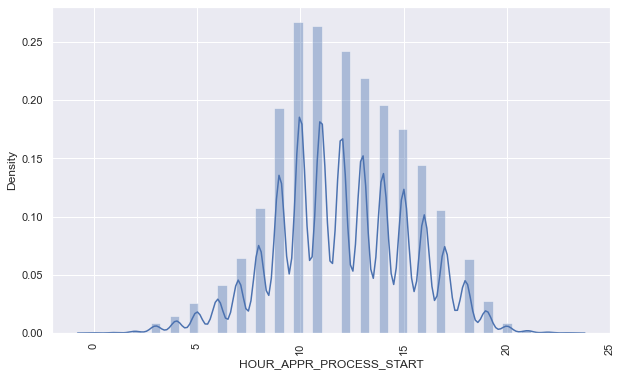

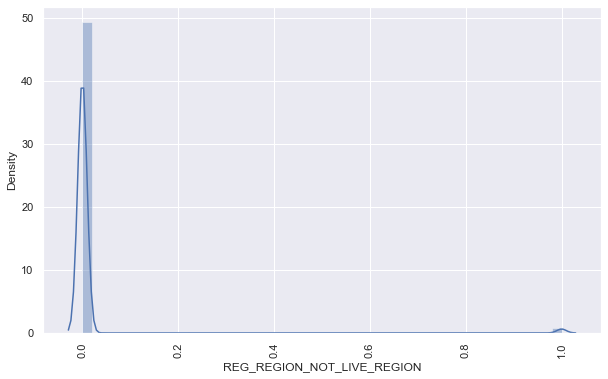

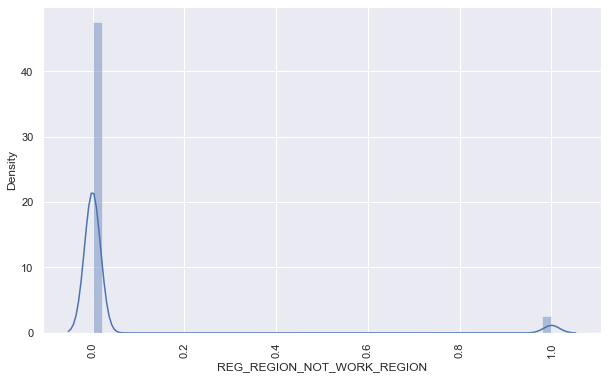

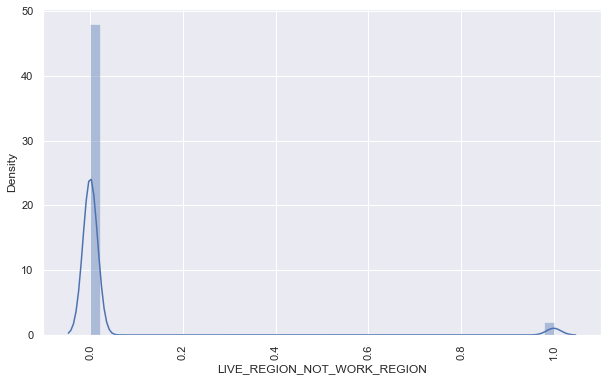

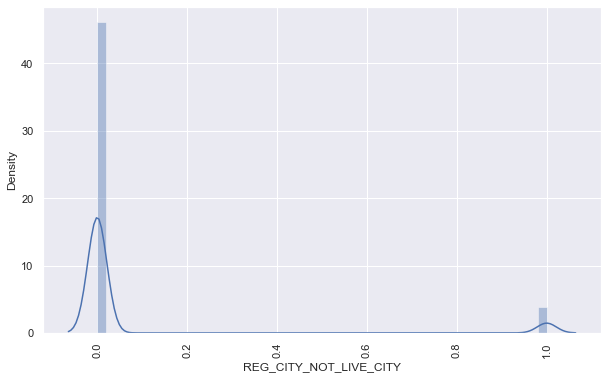

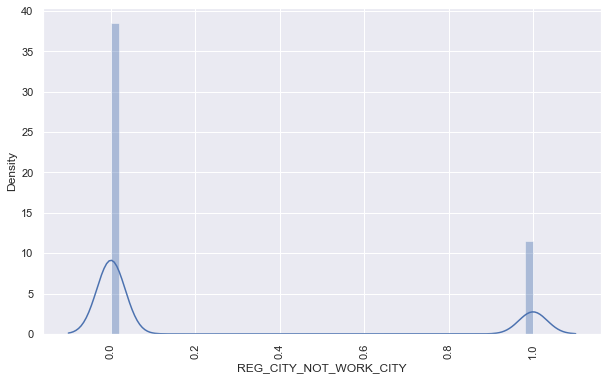

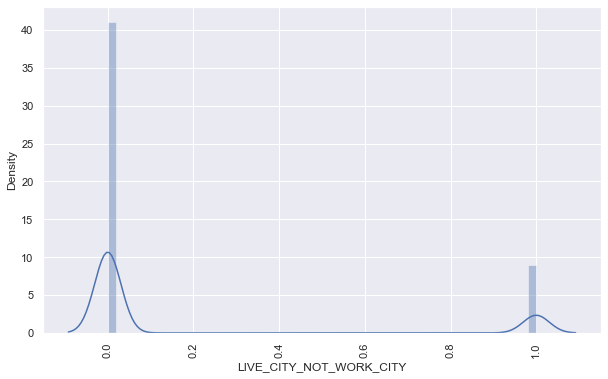

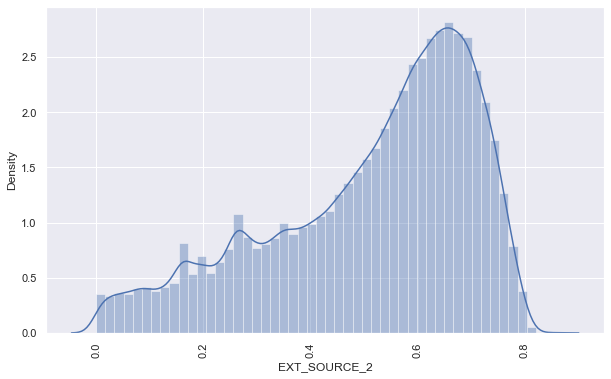

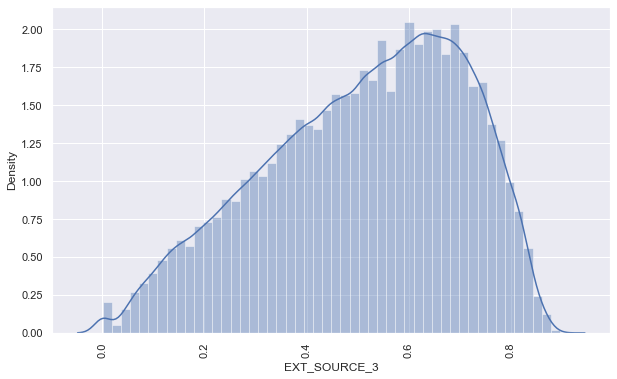

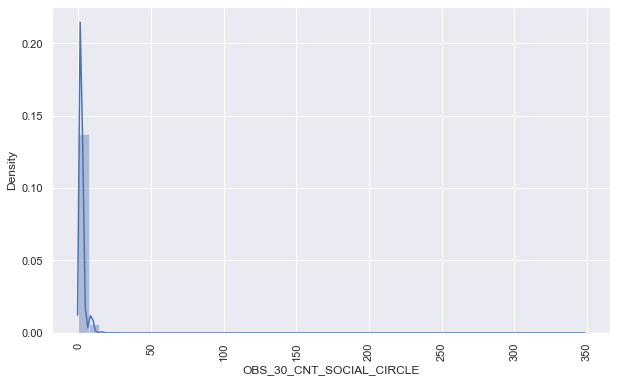

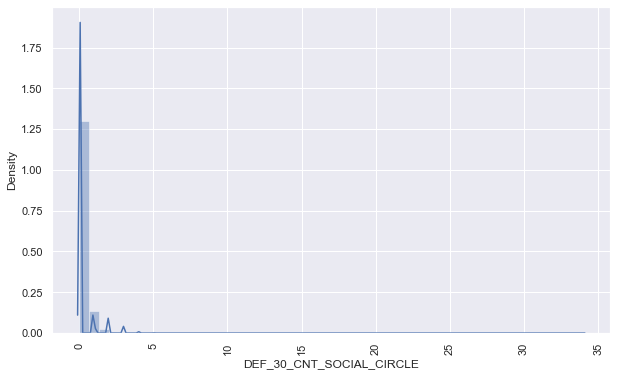

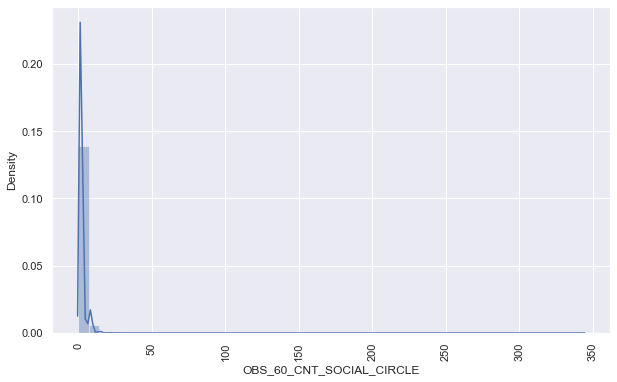

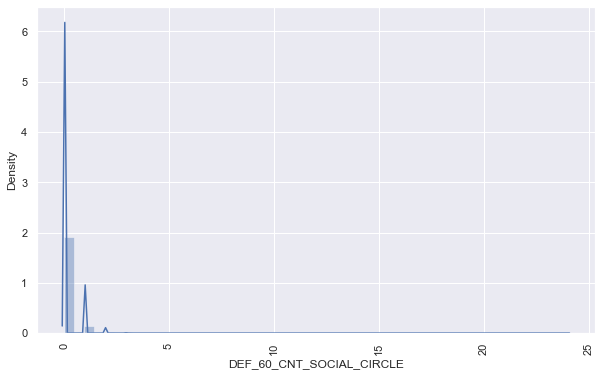

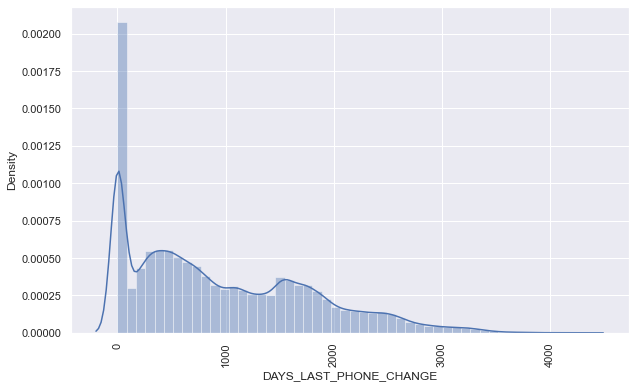

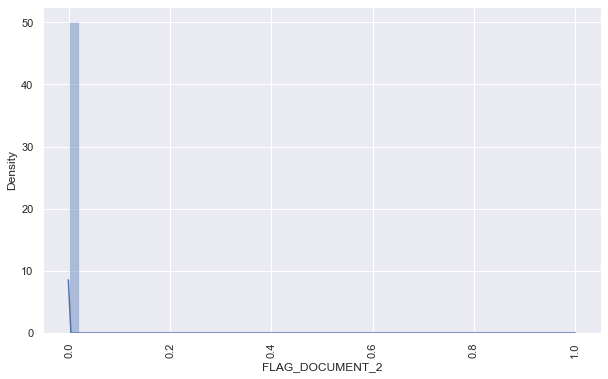

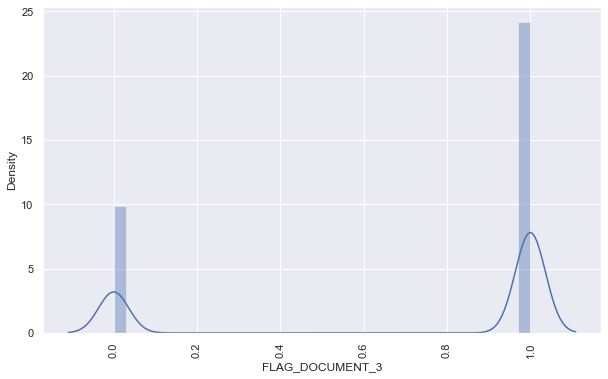

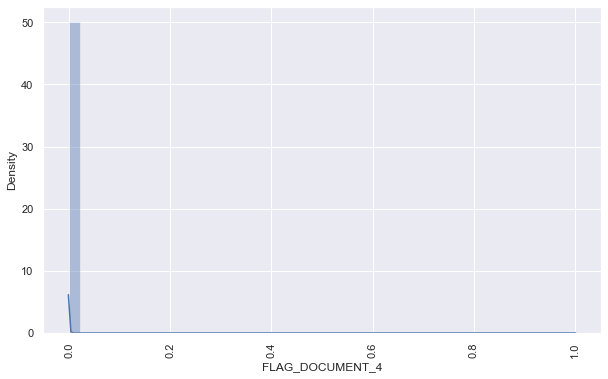

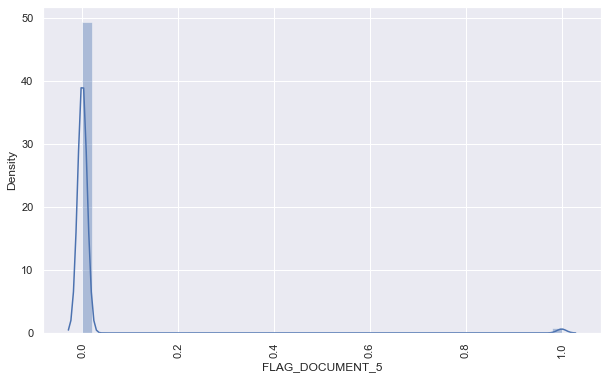

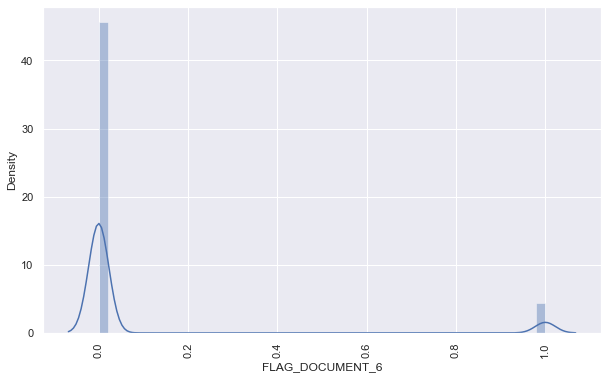

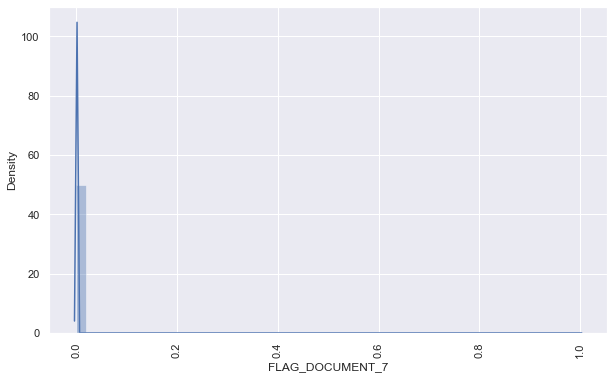

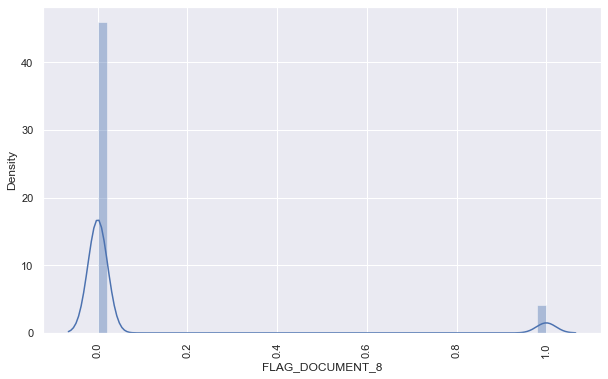

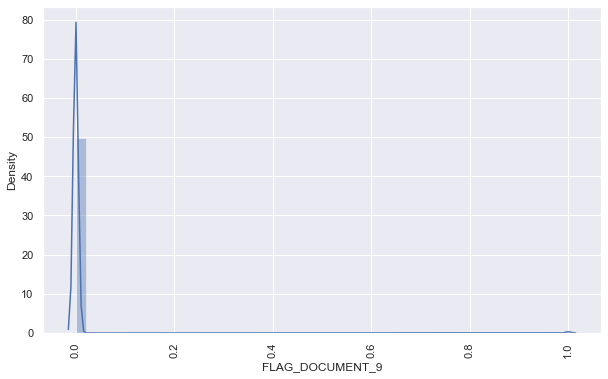

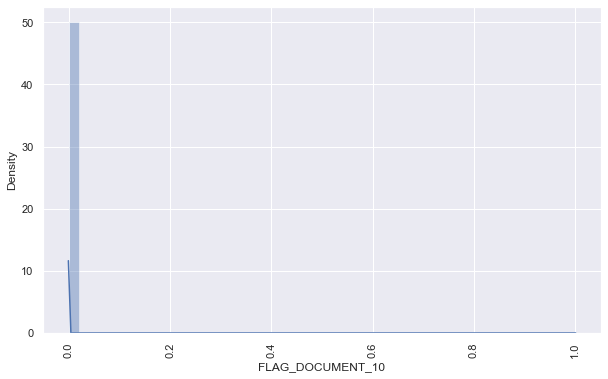

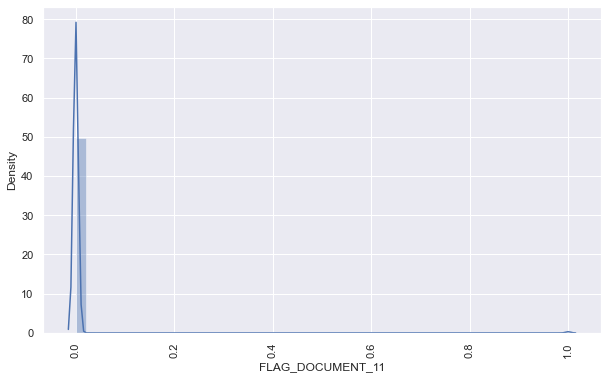

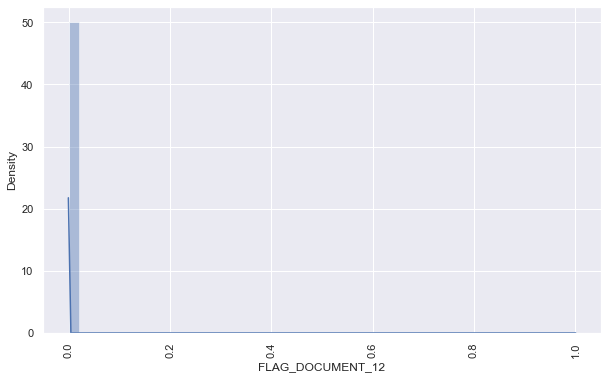

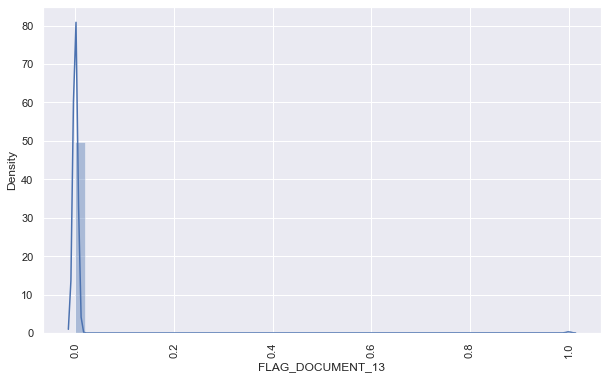

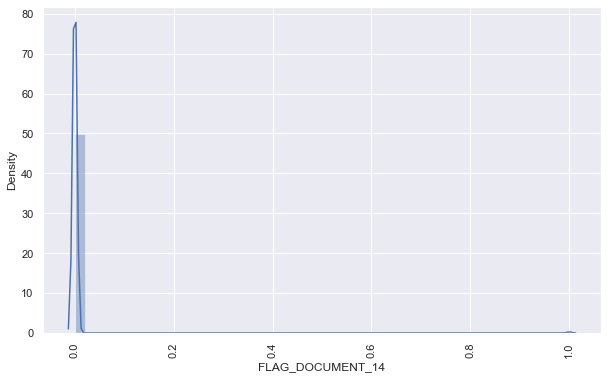

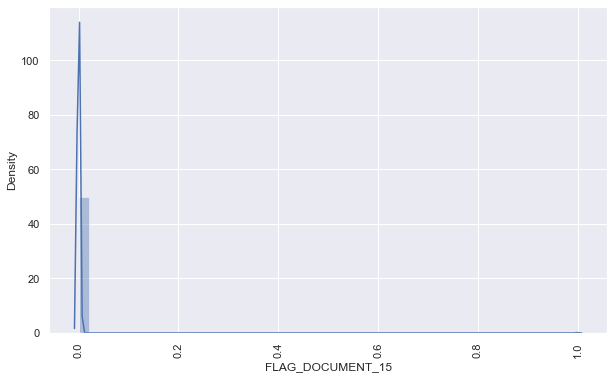

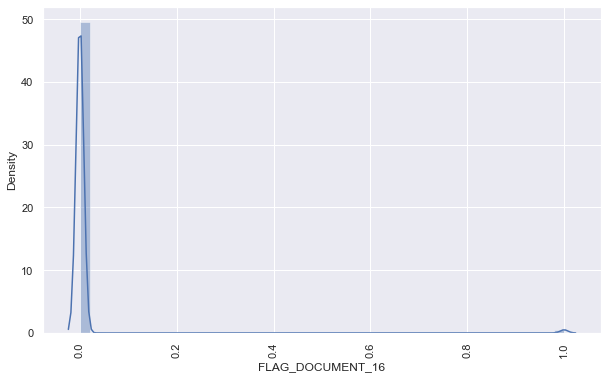

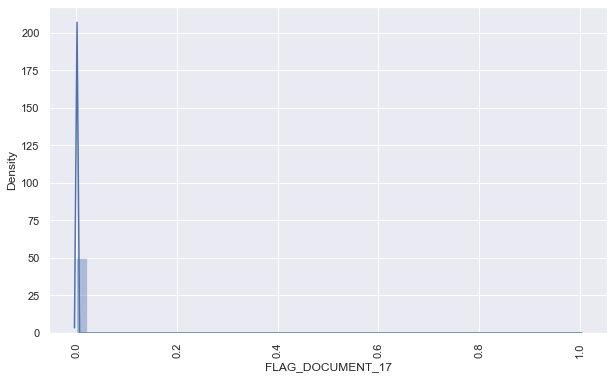

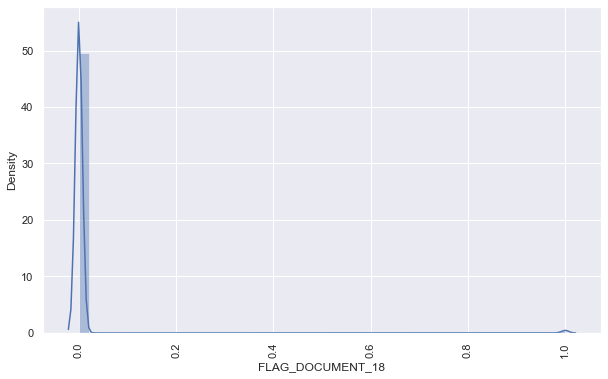

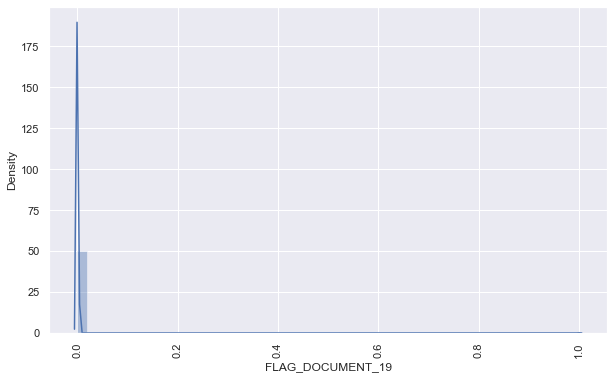

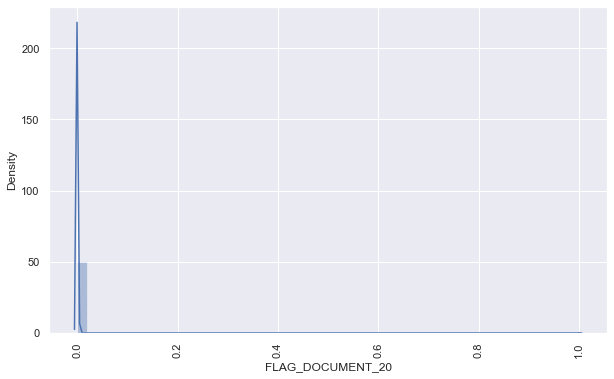

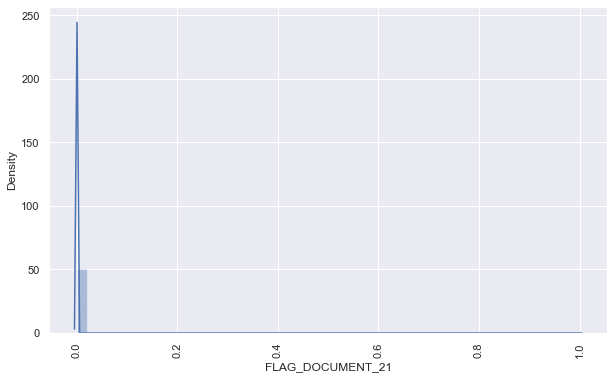

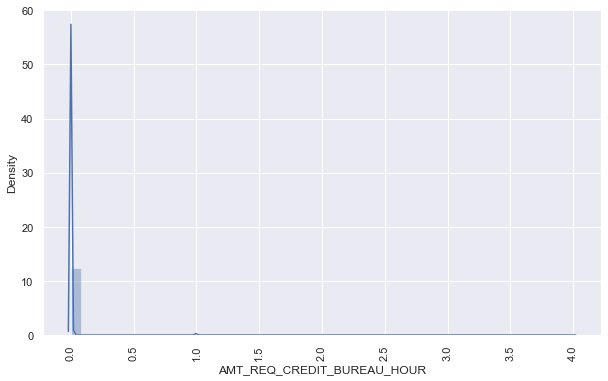

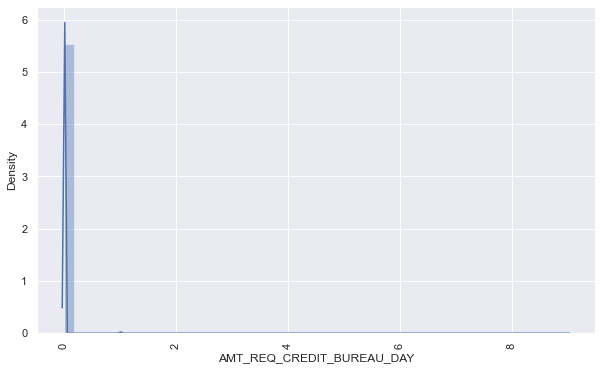

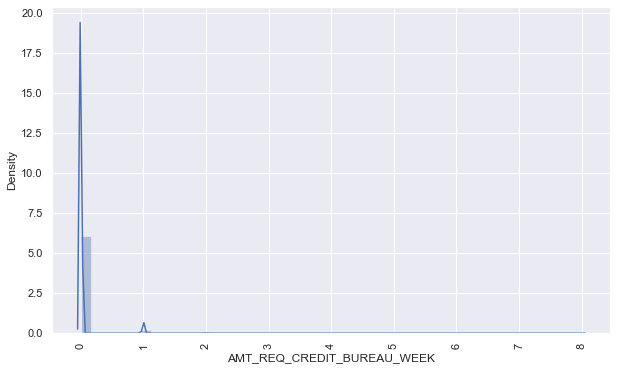

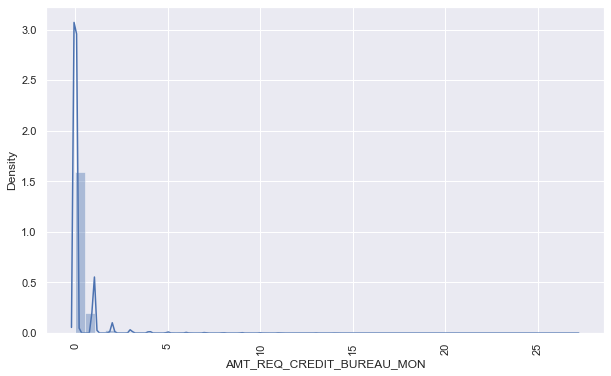

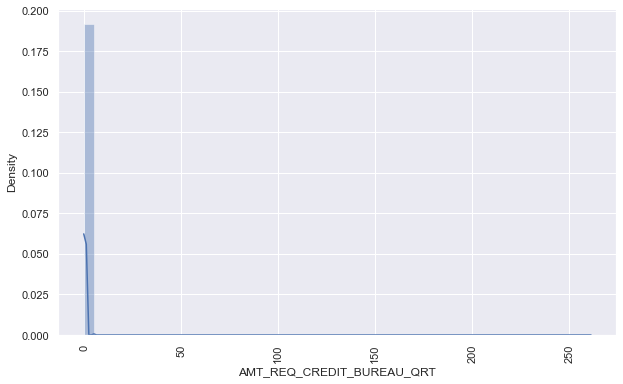

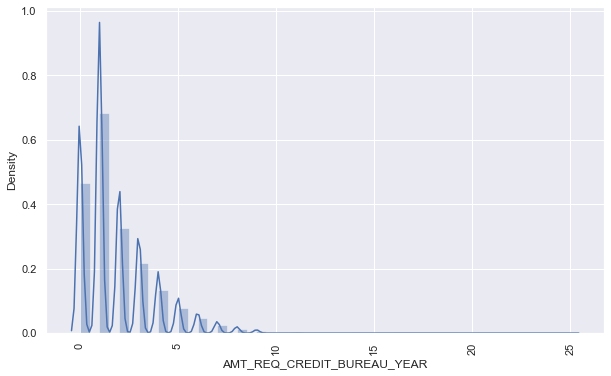

In [127]:
#we had already segregated numerical columns
##plotting graphs for Numerical Columns
for i in Numerical:
    plt.figure(figsize = (10,6))
    sns.distplot( loan_application_data_cleaned[i] )
    plt.xticks(rotation=90)
    plt.show()

Observations:
1. AMT_CREDIT: Most of the loans are below 10 Lakhs
2. AMT_ANNUITY: It is mostly below 50000rs
3. AMT_GOODS_PRICE: Most of the loans are given for goods having price less than 10 lakhs
   
    
    

#### Column: AMT_ANNUITY

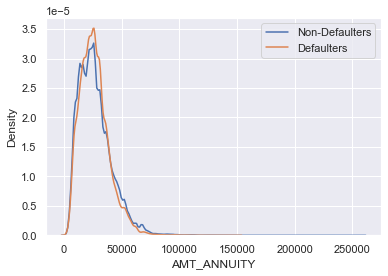

In [128]:
sns.distplot(Other_clients.AMT_ANNUITY,label='Non-Defaulters',hist=False)
sns.distplot(Defaulters.AMT_ANNUITY,label='Defaulters',hist=False)
plt.legend()
plt.show()

#### Column : AMT_CREDIT

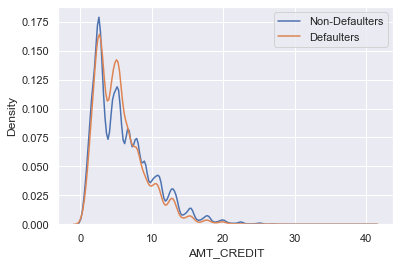

In [129]:
sns.distplot(Other_clients.AMT_CREDIT,label='Non-Defaulters',hist=False)
sns.distplot(Defaulters.AMT_CREDIT,label='Defaulters',hist=False)
plt.legend()
plt.show()

#### Column : AMT_GOODS_PRICE

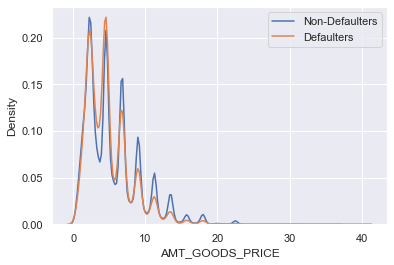

In [130]:
sns.distplot(Other_clients.AMT_GOODS_PRICE,label='Non-Defaulters',hist=False)
sns.distplot(Defaulters.AMT_GOODS_PRICE,label='Defaulters',hist=False)
plt.legend()
plt.show()

Observation:
  * As we can see that the plots for continuous variable mostly overlap for the Defaulters and Non-Defaulters .
  * Hence we cannot infer anything much from these plots.

In [131]:
#Let us try to plot pairplots for some insights.

In [132]:
#sns.pairplot(data = Other_clients ,kind = "scatter")

In [133]:
#sns.pairplot(Other_clients)

#### BIVARIATE analysis on application data

##### AMT_INCOME_TOTAL vs CODE_GENDER-----Continuous vs Categorical

In [134]:
##Calculating mean income on the basis of gender for Non-Defaulters
Other_clients.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()

CODE_GENDER
F    1.559849
M    1.951904
Name: AMT_INCOME_TOTAL, dtype: float64

In [135]:
##Calculating mean income on the basis of gender for Defaulters
Defaulters.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()

CODE_GENDER
F    1.566709
M    1.775021
Name: AMT_INCOME_TOTAL, dtype: float64

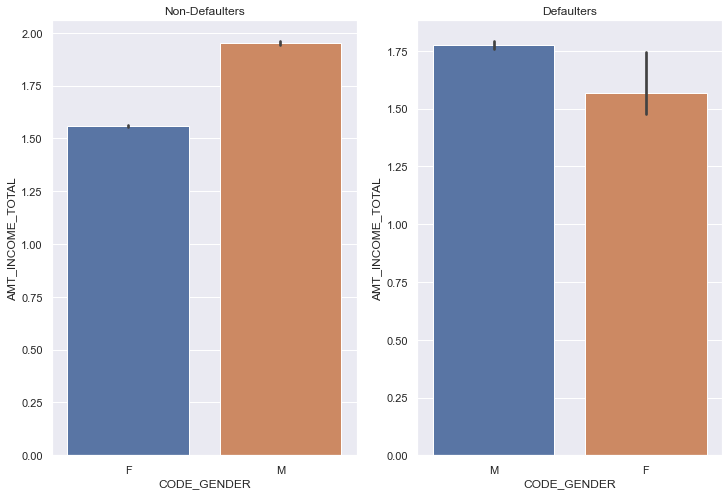

In [136]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.barplot(data = Other_clients, x = 'CODE_GENDER',y ='AMT_INCOME_TOTAL' )


plt.subplot(1,2,2)
plt.title('Defaulters')
sns.barplot(data = Defaulters, x = 'CODE_GENDER',y ='AMT_INCOME_TOTAL' )
plt.show()

Observation:
*    We can see that Income for males is more than females both in the case of defaulters and non defaulters.
*    As we have analysed beforw that percentage of men(10%) defaulters are more compaired to females(6%)
*    It implies that although males are earning more , despite that they are defaulting the loans.

##### 'CODE_GENDER' vs 'AMT_CREDIT'----Categorical vs Continuous

In [137]:
Defaulters.groupby('CODE_GENDER')['AMT_CREDIT'].median()

CODE_GENDER
F    4.9752
M    4.9500
Name: AMT_CREDIT, dtype: float64

In [138]:
Defaulters.groupby('CODE_GENDER')['AMT_CREDIT'].mean()

CODE_GENDER
F    5.611401
M    5.533080
Name: AMT_CREDIT, dtype: float64

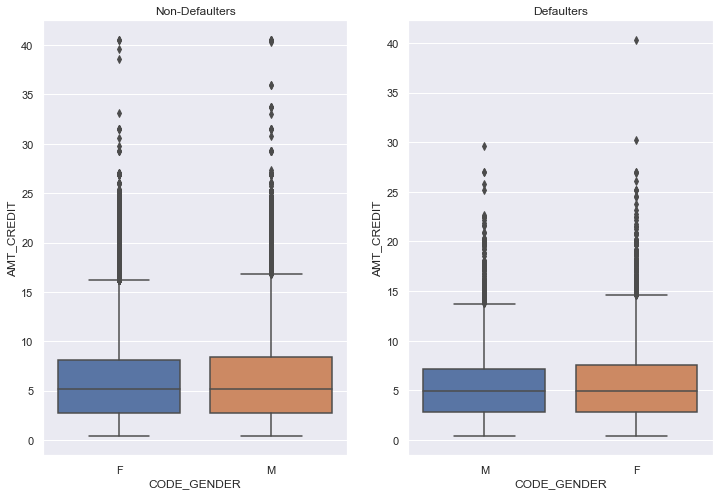

In [139]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.boxplot(data = Other_clients, x = 'CODE_GENDER',y ='AMT_CREDIT' )


plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data = Defaulters, x = 'CODE_GENDER',y ='AMT_CREDIT' )
plt.show()

Observation: 
* There are considerable number of outliers but the median value is same for both males and females in both the cases of      Defaulters as well as non-defaulters.

##### NAME_EDUCATION_TYPE vs AMT_CREDIT---Categorical vs Continuous

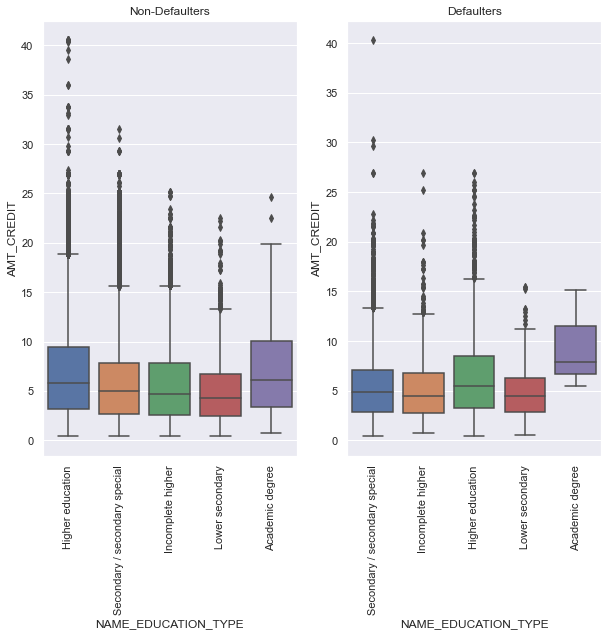

In [207]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
sns.boxplot(data = Other_clients, x = 'NAME_EDUCATION_TYPE',y ='AMT_CREDIT' )
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
sns.boxplot(data = Defaulters, x = 'NAME_EDUCATION_TYPE',y ='AMT_CREDIT' )
plt.xticks(rotation=90)
plt.show()

Observation:
*  We can see considerable outliers in higher education implying AMT_CREDIT was higher in several cases but that is fine given the fee is higher for higher and Secondary education.
* Academic degree clients are safest.
* Clients belonging to Incomplete higher are at risk for being defaulters.

#### NAME_CONTRACT_TYPE vs AMT_CREDIT----Categorical vs Continuous

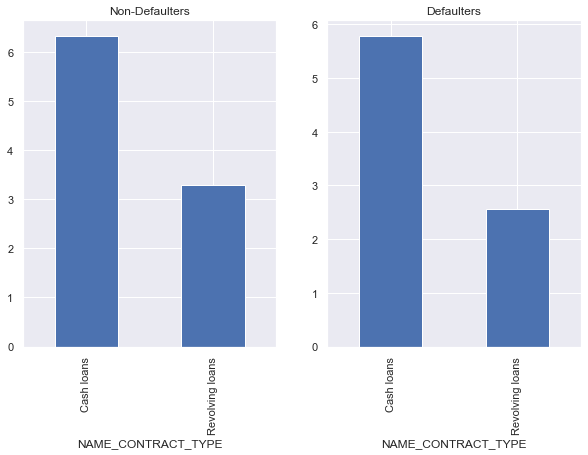

In [141]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
Other_clients.groupby(['NAME_CONTRACT_TYPE'])['AMT_CREDIT'].mean().plot.bar()
plt.subplot(1,2,2)
plt.title('Defaulters')
Defaulters.groupby(['NAME_CONTRACT_TYPE'])['AMT_CREDIT'].mean().plot.bar()
plt.show()

Observation:
* We can see that Cash loans are credit of higher amounts in comparison to Revolving Loans.

#### NAME_EDUCATION_TYPE vs NAME_CONTRACT_TYPE-------Categorical vs Categorical

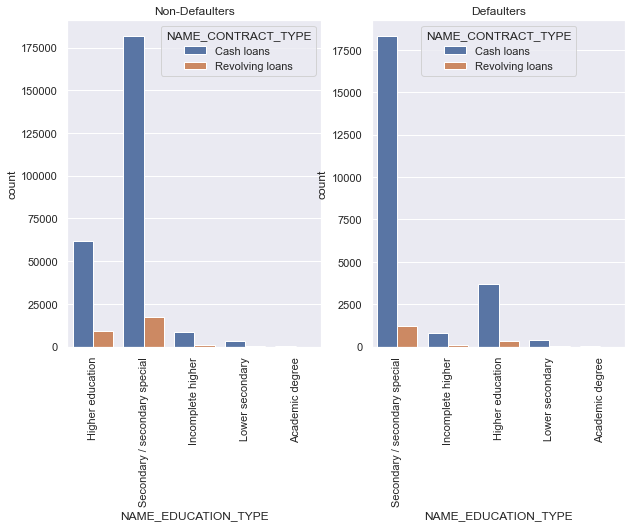

In [142]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
col = 'NAME_EDUCATION_TYPE'
hue = 'NAME_CONTRACT_TYPE'
sns.countplot(x=col, hue=hue, data=Other_clients)
plt.xticks(rotation=90)


plt.subplot(1,2,2)
plt.title('Defaulters')
col = 'NAME_EDUCATION_TYPE'
hue = 'NAME_CONTRACT_TYPE'
sns.countplot(x=col, hue=hue, data=Defaulters)
plt.xticks(rotation=90)
plt.show()

### Correlation-----Continuous vs Continuous

#### Non Defaulters correlation

In [143]:
corr1 = Other_clients.corr()

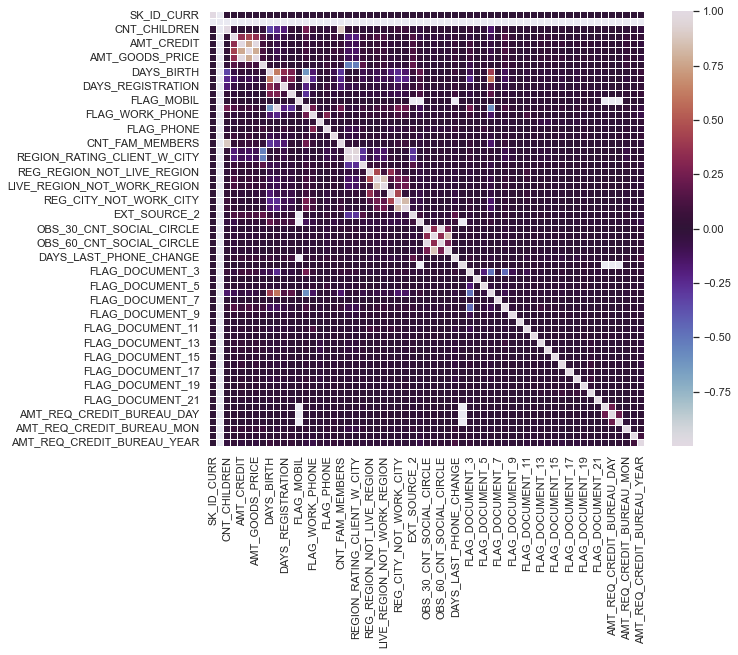

In [211]:
plt.figure(figsize = (10,8))
sns.heatmap( corr1,cmap = "twilight", linewidths=0.5,square = True)
plt.show()

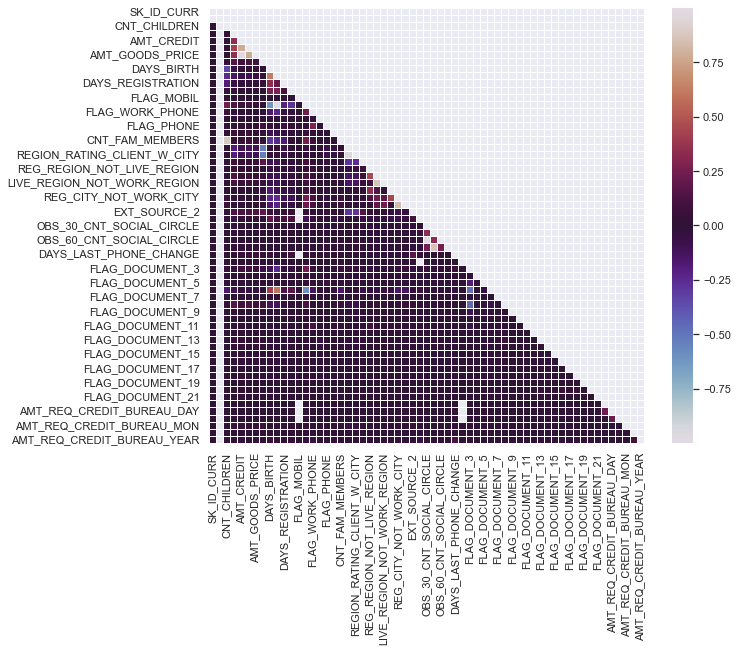

In [212]:
##creating mask to ignore repeated values
mask = np.triu(np.ones_like(corr1))
plt.figure(figsize = (10,8))
sns.heatmap( corr1,cmap = "twilight", linewidths=0.5,square = True, mask = mask)
plt.show()

#### Top 10 Non Defaulters correlation

In [146]:
#using abs() converting negative coefficients to positive
corr1_10 = Other_clients.corr().abs()
#ignoring values having correlation = 1
corr1_10 = corr1_10[corr1_10 != 1.0]
#sorting values
corr1_10 = corr1_10.unstack().sort_values(kind="heap")
#dropping nulls
corr1_10 = corr1_10.dropna()
#sorting in ascending order
print(corr1_10.sort_values(ascending = False))


FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999756
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999756
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
REG_CITY_NOT_WORK_CITY       LIVE_

Top 10 correlations of non defaulters

In [147]:
#Top 10 correlations of non defaulters
#Removing duplicates
corr1_10.drop_duplicates(keep='first', inplace=True)
#printing the top 10 correlations of non defaulters
print(corr1_10.sort_values(ascending = False).head(10))

DAYS_EMPLOYED                FLAG_EMP_PHONE                0.999756
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998508
AMT_CREDIT                   AMT_GOODS_PRICE               0.987250
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859332
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE               0.776686
                             AMT_CREDIT                    0.771309
dtype: float64


Observations
* AMT_CREDIT is highly correlated with AMT_GOODS_PRICE which in turn is highly correlated with  AMT_ANNUITY 
* CNT_FAM_MEMBERS   is highly correlated CNT_CHILDREN which is very logical.

#### Defaulters Correlation

In [148]:
corr2 = Defaulters.corr()

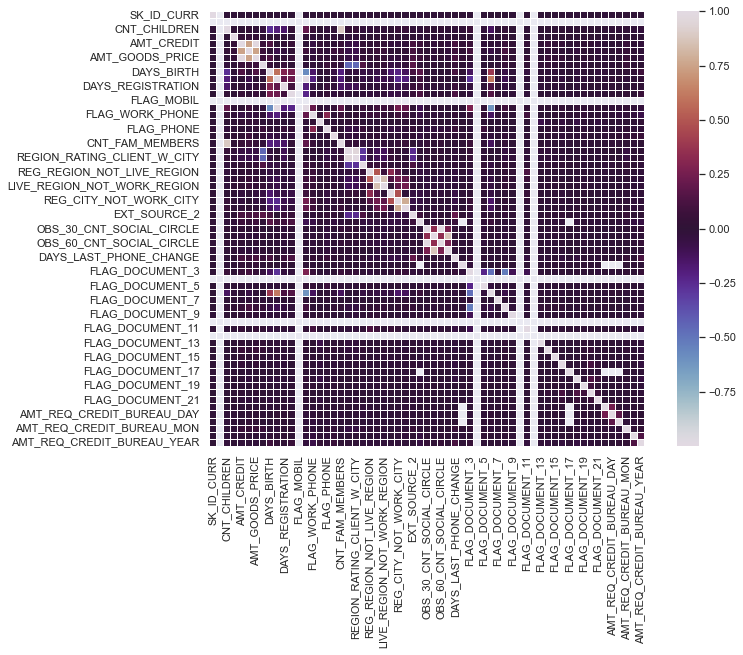

In [149]:
plt.figure(figsize = (12,8))
sns.heatmap( corr2,cmap = "twilight", linewidths=0.5,square = True)
plt.show()

In [150]:
#using abs() converting negative coefficients to positive
corr2_10 = Defaulters.corr().abs()
#ignoring values having correlation = 1
corr2_10 = corr2_10[corr2_10 != 1.0]
#sorting values
corr2_10 = corr2_10.unstack().sort_values(kind="heap")
#dropping nulls
corr2_10 = corr2_10.dropna()
#sorting in ascending order
print(corr2_10.sort_values(ascending = False))

FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999705
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999705
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
REG_CITY_NOT_WORK_CITY       LIVE_

#### Top 10 correlations of non defaulters

In [151]:
#Top 10 correlations of non defaulters
#Removing duplicates
corr2_10.drop_duplicates(keep='first', inplace=True)
#printing the top 10 correlations of non defaulters
print(corr2_10.sort_values(ascending = False).head(10))

DAYS_EMPLOYED                FLAG_EMP_PHONE                0.999705
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998269
AMT_CREDIT                   AMT_GOODS_PRICE               0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE               0.752699
                             AMT_CREDIT                    0.752195
dtype: float64


### Analysing Previous Application Data

#### Checking for null values

In [152]:
previous_application_data.shape

(1670214, 37)

In [153]:
#set the max rows to none
pd.set_option('display.max_rows', None)
#applying the above created function to out dataset
null_values_percent(previous_application_data)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

### Treating Missing Values in Previous Application data

In [154]:
#Using already created function to check for columns having more than 45 percent missing values

In [155]:
null_values_percent(previous_application_data)[null_values_percent(previous_application_data)>50]

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

There are columns having more than 50 percent null values
We will drop these values for further analysis

##### Treating columns having more than 50 percent null values

In [156]:
previous_application_data_cleaned = previous_application_data.loc[:,null_values_percent(previous_application_data)<50]

In [157]:
previous_application_data_cleaned.shape

(1670214, 33)

##### Treating columns having more than 10 percent null values

In [158]:
null_values_percent(previous_application_data_cleaned)[null_values_percent(previous_application_data_cleaned)>10]

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [159]:
previous_application_data_cleaned.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06   
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01   
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00   
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00   
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01   
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01   
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    76582.403064      81992.343838                   0.332570  
std    149647.415123     153303.516729                   0.471134  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1314.000000      -1270.000000                   0.000000  
50%      -537.000000       -499.000000                   0.000000  
75%       -74.000000        -44.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

##### Treating column NAME_TYPE_SUITE 

In [160]:
#reseting max rows
pd.reset_option("max_rows")

In [161]:
previous_application_data_cleaned.NAME_TYPE_SUITE 

0                      NaN
1            Unaccompanied
2          Spouse, partner
3                      NaN
4                      NaN
                ...       
1670209                NaN
1670210      Unaccompanied
1670211    Spouse, partner
1670212             Family
1670213             Family
Name: NAME_TYPE_SUITE, Length: 1670214, dtype: object

In [162]:
#Filling NaN values in NAME_TYPE_SUITE with "Unknown"
previous_application_data_cleaned.NAME_TYPE_SUITE = previous_application_data_cleaned.NAME_TYPE_SUITE.fillna("Unknown")


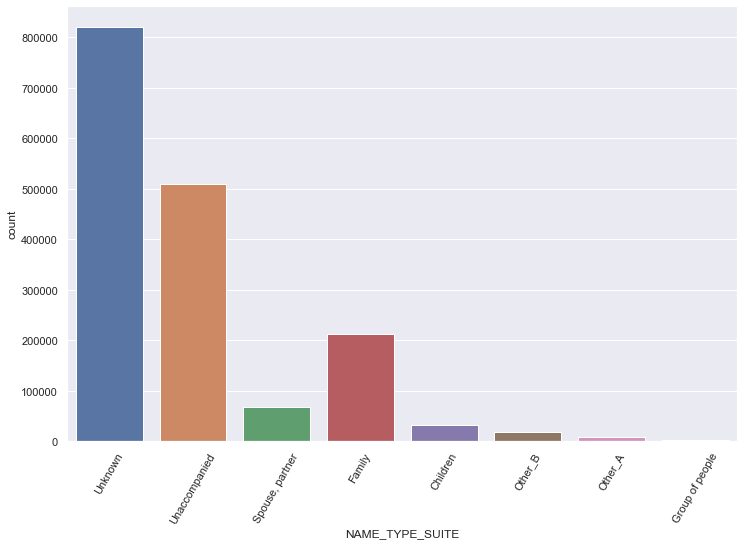

In [163]:
##ploting a count plot for the NAME_TYPE_SUITE column just to verify that now a category "Unknown" is added on x axis
plt.figure(figsize = (12,8))
sns.countplot(previous_application_data_cleaned.NAME_TYPE_SUITE)
plt.xticks(rotation=60)
plt.show()

In [164]:
null_values_percent(previous_application_data_cleaned)[null_values_percent(previous_application_data_cleaned)>10]

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [165]:
##Null values in columns that count days

We can see there are null values in few columns that count days so we will keep them as it is
'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION' and 'DAYS_LAST_DUE'

##### Column: AMT_ANNUITY 

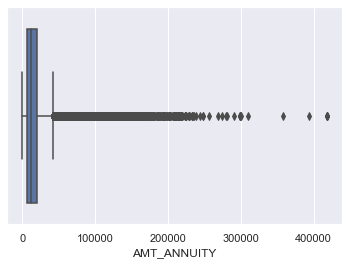

In [166]:
sns.boxplot(previous_application_data_cleaned.AMT_ANNUITY)
plt.show()

In [167]:
#From the boxplot it is evident that outliers exist for the data of AMT_Annuity . 
#Hence we will use median value to fill null values

In [168]:
previous_application_data_cleaned.AMT_ANNUITY.median()

11250.0

In [169]:
#filling NaN values with median value
previous_application_data_cleaned.AMT_ANNUITY.fillna(previous_application_data_cleaned.AMT_ANNUITY.median(),inplace = True)

##### AMT_GOODS_PRICE

In [170]:
#AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given
#It is sort of categorical value column hence we will fill NaN values with mode value

In [171]:
#filling NaN values with mode value
#previous_application_data_cleaned.AMT_GOODS_PRICE.fillna(previous_application_data_cleaned.AMT_GOODS_PRICE.mode(),inplace = True)


In [172]:
#previous_application_data_cleaned.AMT_GOODS_PRICE.isnull().sum()

##### CNT_PAYMENT

In [173]:
#CNT_PAYMENT	Term of previous credit at application of the previous application


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='CNT_PAYMENT'>

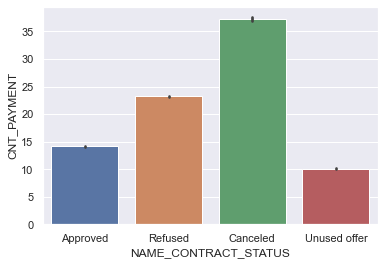

In [174]:
#Bivariate Analysis
#Comparing NAME_CONTRACT_STATUS with CNT_PAYMENT for understanding 
sns.barplot(previous_application_data_cleaned.NAME_CONTRACT_STATUS,previous_application_data_cleaned.CNT_PAYMENT)

In [175]:
previous_application_data_cleaned.CNT_PAYMENT.isnull().sum()

372230

In [176]:
#Checking status in NAME_CONTRACT_STATUS column where CNT_PAYMENT is having NAN values

previous_application_data_cleaned.loc[previous_application_data_cleaned.CNT_PAYMENT.isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Observation:
1.    We can see for the null values in CNT_PAYMENT only 4 offers are approved out of 372230 ,
2.   Rest of the applications were either Cancelled or Refused or Unused
3.    It implies that the loan payment was not started at all
4.   Hence we can impute null values in CNT_PAYMENT with 0

In [177]:
# Imputing null values in CNT_PAYMENT with 0
previous_application_data_cleaned.CNT_PAYMENT.fillna(0,inplace = True)

### Standarization of Values

In [178]:
previous_application_data_cleaned.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06   
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.247621e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.447588e+01   
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00   
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  0.000000e+00   
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.000000e+01   
75%              1.000000e+00  -2.800000e+02      8.200000e+01  1.600000e+01   
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342209.855039    13826.269337               33767.774054   
std          88916.115834    72444.869708              106857.034789   
min          -2922.000000    -2892.000000               -2801.000000   
25%         365243.000000    -1628.000000               -1242.000000   
50%         365243.000000     -831.000000                -361.000000   
75%         365243.000000     -411.000000                 129.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    76582.403064      81992.343838                   0.332570  
std    149647.415123     153303.516729                   0.471134  
min     -2889.000000      -2874.000000                   0.000000  
25%     -1314.000000      -1270.000000                   0.000000  
50%      -537.000000       -499.000000                   0.000000  
75%       -74.000000        -44.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

We can see few columns that store the value of days in negative. We will change them to positive values.

In [179]:
#Here we are using abs() function to convert negative days value to positive
previous_application_data_cleaned.DAYS_TERMINATION = abs(previous_application_data_cleaned.DAYS_TERMINATION)
previous_application_data_cleaned.DAYS_LAST_DUE = abs(previous_application_data_cleaned.DAYS_LAST_DUE)
previous_application_data_cleaned.DAYS_LAST_DUE_1ST_VERSION = abs(previous_application_data_cleaned.DAYS_LAST_DUE_1ST_VERSION)
previous_application_data_cleaned.DAYS_FIRST_DUE = abs(previous_application_data_cleaned.DAYS_FIRST_DUE)
previous_application_data_cleaned.DAYS_FIRST_DRAWING = abs(previous_application_data_cleaned.DAYS_FIRST_DRAWING)
previous_application_data_cleaned.DAYS_DECISION = abs(previous_application_data_cleaned.DAYS_DECISION)

#### Outliers

In [180]:
previous_application_data_cleaned.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06   
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.247621e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.447588e+01   
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00   
25%              1.000000e+00   2.800000e+02     -1.000000e+00  0.000000e+00   
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.000000e+01   
75%              1.000000e+00   1.300000e+03      8.200000e+01  1.600000e+01   
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342340.056543    15949.224065               35163.363265   
std          88413.495220    72007.270877              106405.950190   
min              2.000000        2.000000                   0.000000   
25%         365243.000000      475.000000                 257.000000   
50%         365243.000000      921.000000                 741.000000   
75%         365243.000000     1825.000000                1735.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000              997149.000000  
mean    78152.730207      83505.775017                   0.332570  
std    148833.342466     152484.418802                   0.471134  
min         2.000000          2.000000                   0.000000  
25%       455.000000        447.000000                   0.000000  
50%      1155.000000       1171.000000                   0.000000  
75%      2418.000000       2501.000000                   1.000000  
max    365243.000000     365243.000000                   1.000000

In [181]:
#Viewing the output of describe function we suspect few columns to have Outliers present 
#Columns which have vast difference between 75% value and max value
#["AMT_ANNUITY","AMT_APPLICATION",  "AMT_CREDIT","CNT_PAYMENT","DAYS_DECISION"]
             

In [182]:
#Let us store the columns to be analysed in a list Outliers_analysed
Outlierspre_analysed = ["AMT_ANNUITY","AMT_APPLICATION",  "AMT_CREDIT","CNT_PAYMENT","DAYS_DECISION"]

AMT_ANNUITY


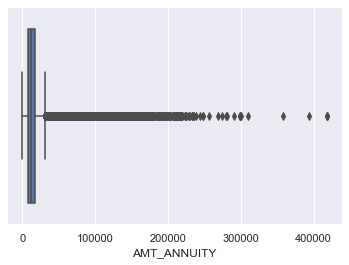

AMT_APPLICATION


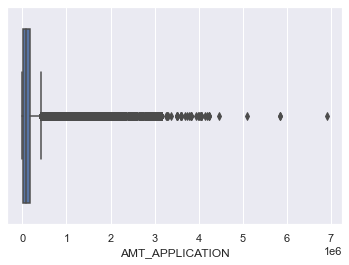

AMT_CREDIT


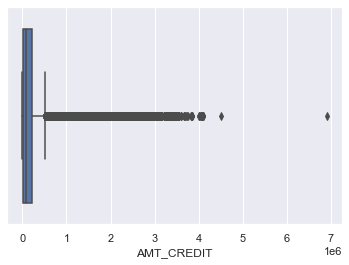

CNT_PAYMENT


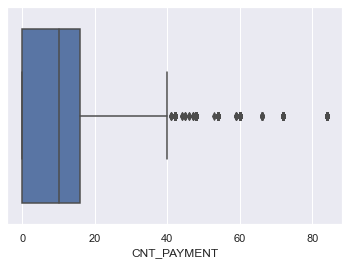

DAYS_DECISION


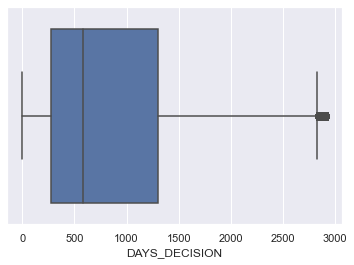

In [183]:
for i in Outlierspre_analysed:
    print(i)
    sns.boxplot(previous_application_data_cleaned[i])
    plt.show()

Observations:
1. There are few outliers in DAYS_DECISION implying that few applications were pending for a long before any action was taken.
2. Columns "AMT_ANNUITY","AMT_APPLICATION",  "AMT_CREDIT" have a considerable number of outliers present implying as before in 
    application data.

In [184]:
previous_application_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### Merging application_data and previous_application 

In [185]:
previous_application_data.shape

(1670214, 37)

In [186]:
#Checking the count values of current_ID and previous_ID to check if there exists duplicates

In [187]:
previous_application_data.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [188]:
previous_application_data.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

We can see count for SK_ID_CURR is 338857 and count for SK_ID_PREV is 1670214 implying there are duplicates present.
This infers that maybe multiple loans were taken by same people one after the previous was repayed or parallely.

In [189]:
#Merging datframes on the basis of SK_ID_CURR

In [190]:
combined_data = loan_application_data_cleaned.merge(previous_application_data_cleaned, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [191]:
combined_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0          565.0   
1             Cash X-Sell: low           365243.0          716.0   
2   POS industry with interest           365243.0          797.0   
3  POS household with interest           365243.0         2310.0   
4  POS mobile without interest           365243.0          784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0           25.0              17.0   
1                      386.0          536.0             527.0   
2                      647.0          647.0             639.0   
3                     1980.0         1980.0            1976.0   
4                      694.0          724.0             714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 108 columns]

In [192]:
combined_data.shape

(1413701, 108)

In [193]:
combined_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=108)

Segregating merged data to Defaulters and Other clients as we did before for analysis purpose.

In [194]:
##Separating TARGET values into Defaulters and Other_clients 
Other_clients_com = combined_data.loc[combined_data['TARGET'] == 0]
Defaulters_com = combined_data.loc[combined_data['TARGET'] == 1]

##### NFLAG_INSURED_ON_APPROVAL

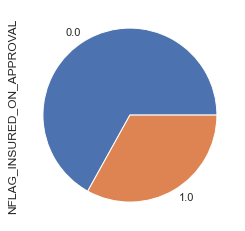

In [195]:
combined_data.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie()
plt.show()

#### Analysing merged data on the basis of GENDER

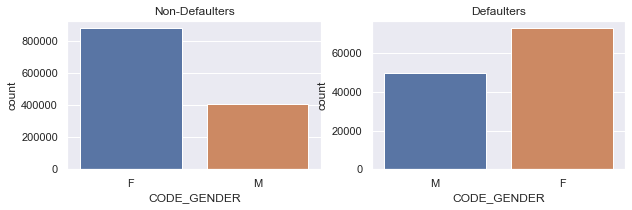

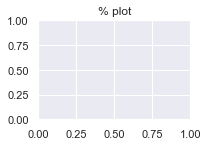

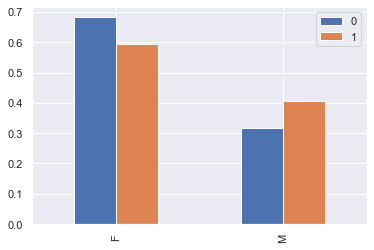

In [196]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='CODE_GENDER',data=Other_clients_com)

plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='CODE_GENDER',data=Defaulters_com)
plt.show()

plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients_com.CODE_GENDER.value_counts())/len(Other_clients_com))
df['1']= ((Defaulters_com.CODE_GENDER.value_counts())/len(Defaulters_com))
df.plot.bar()
plt.show()

#### Analysing merged data on the basis of NAME_EDUCATION_TYPE

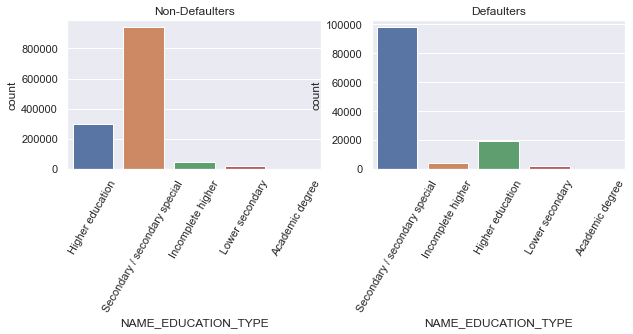

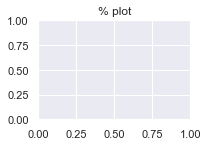

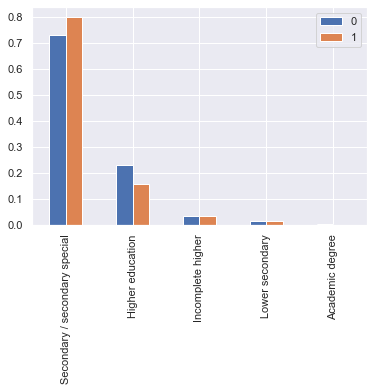

In [197]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Other_clients_com)
plt.xticks(rotation=60)

plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=Defaulters_com)
plt.xticks(rotation=60)
plt.show()

plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients_com.NAME_EDUCATION_TYPE.value_counts())/len(Other_clients_com))
df['1']= ((Defaulters_com.NAME_EDUCATION_TYPE.value_counts())/len(Defaulters_com))
df.plot.bar()
plt.show()

#### Analysing merged data on the basis of NAME_HOUSING_TYPE

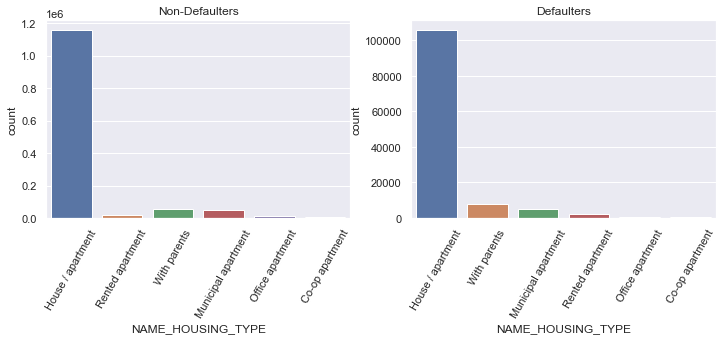

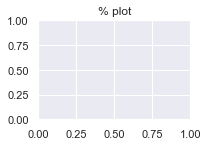

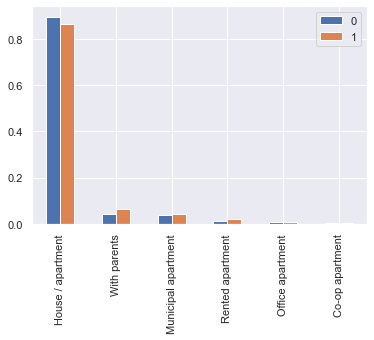

In [198]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_HOUSING_TYPE',data=Other_clients_com)
plt.xticks(rotation=60)
plt.subplot(2,2,2)
plt.title('Defaulters')
sns.countplot(x='NAME_HOUSING_TYPE',data=Defaulters_com)
plt.xticks(rotation=60)
plt.show()
plt.subplot(2,2,3)
plt.title('% plot')
df = pd.DataFrame()
df['0']= ((Other_clients_com.NAME_HOUSING_TYPE.value_counts())/len(Other_clients_com))
df['1']= ((Defaulters_com.NAME_HOUSING_TYPE.value_counts())/len(Defaulters_com))
df.plot.bar()
plt.show()

In [199]:
combined_data.CODE_REJECT_REASON.isnull().sum()


0

From the above plots it is visible that observation is more or less same as it was in application data analysis.


Hence we move forward with Bivariate analysis.

### Bivariate Analysis

#### NAME_CONTRACT_STATUS vs CNT_PAYMENT

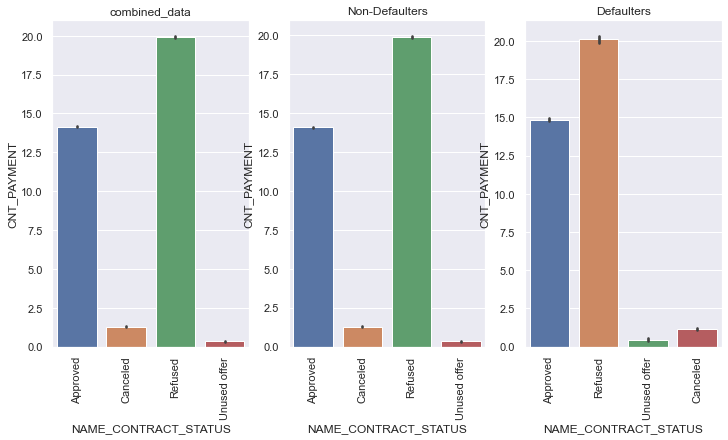

In [200]:
#Comparing NAME_CONTRACT_STATUS with CNT_PAYMENT for understanding
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('combined_data')
sns.barplot(combined_data.NAME_CONTRACT_STATUS,combined_data.CNT_PAYMENT)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
plt.title('Non-Defaulters')
sns.barplot(Other_clients_com.NAME_CONTRACT_STATUS,Other_clients_com.CNT_PAYMENT)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
plt.title('Defaulters')
sns.barplot(Defaulters_com.NAME_CONTRACT_STATUS,Defaulters_com.CNT_PAYMENT)
plt.xticks(rotation=90)
plt.show() 

#### NAME_CONTRACT_STATUS VS TARGET

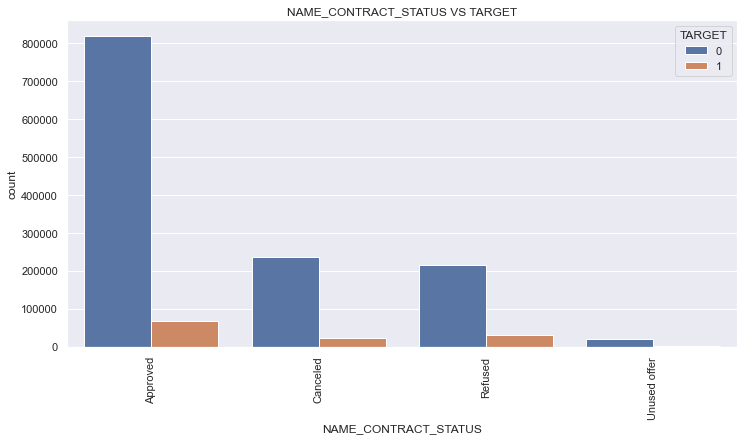

In [201]:
plt.figure(figsize=(12,6))
plt.title('NAME_CONTRACT_STATUS VS TARGET')
col1 = 'NAME_CONTRACT_STATUS'
hue1 = 'TARGET'
sns.countplot(x=col1, hue=hue1, data=combined_data)
plt.xticks(rotation=90)
plt.show()

#### 'NAME_HOUSING_TYPE' vs 'NAME_CONTRACT_STATUS'

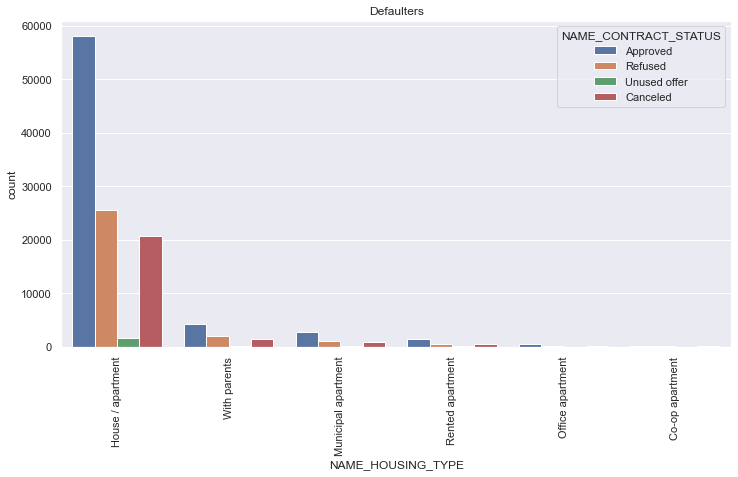

In [218]:
plt.figure(figsize=(12,6))
plt.title('Defaulters')
col1 = 'NAME_HOUSING_TYPE'
hue1 = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col1, hue=hue1, data=Defaulters_com)
plt.xticks(rotation=90)
plt.show()

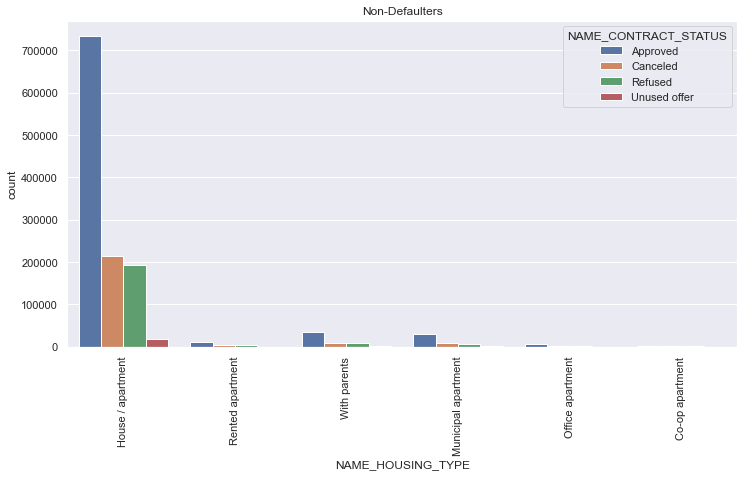

In [219]:
plt.figure(figsize=(12,6))
plt.title('Non-Defaulters')
col1 = 'NAME_HOUSING_TYPE'
hue1 = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col1, hue=hue1, data=Other_clients_com)
plt.xticks(rotation=90)
plt.show()

Observation:
* We can see that high number of clients were refused in house/apartment section and high numbers of refusals in the same section as they have the highest number of applications and high chances of defaulting as compared to others.

#### Contract Status vs NAME_CASH_LOAN_PURPOSE

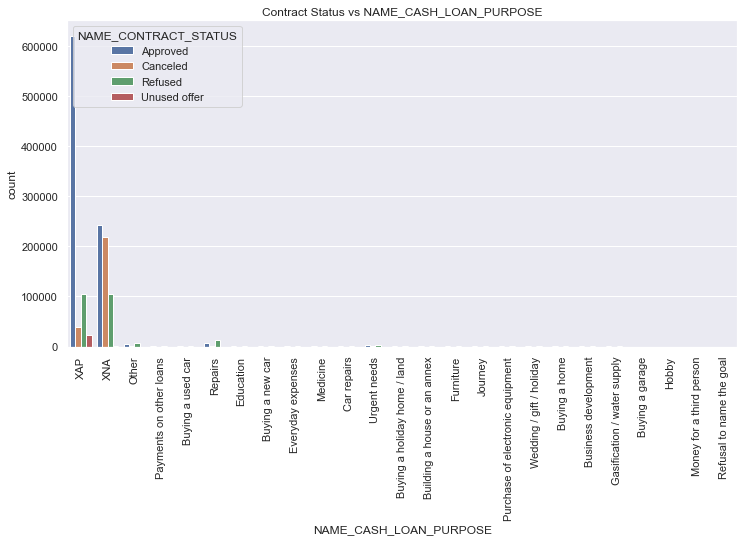

In [202]:
plt.figure(figsize=(12,6))
plt.title('Contract Status vs NAME_CASH_LOAN_PURPOSE')
col1 = 'NAME_CASH_LOAN_PURPOSE'
hue1 = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col1, hue=hue1, data=combined_data)
plt.xticks(rotation=90)
plt.show()

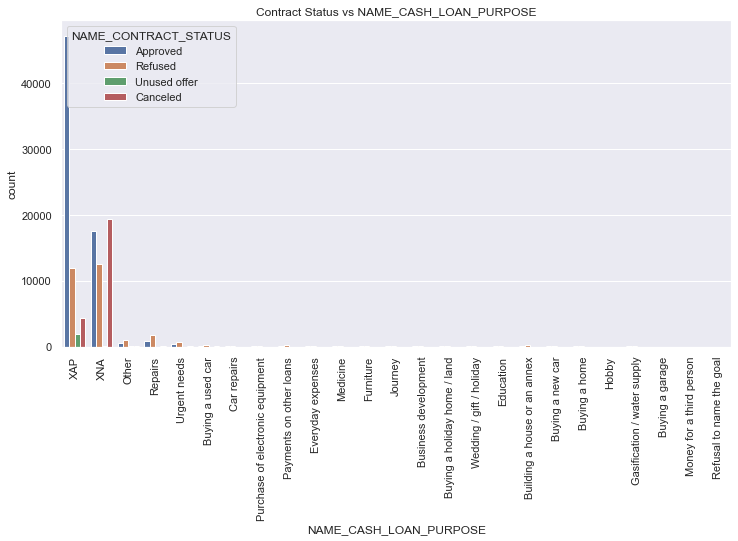

In [203]:
plt.figure(figsize=(12,6))
plt.title('Contract Status vs NAME_CASH_LOAN_PURPOSE')
col1 = 'NAME_CASH_LOAN_PURPOSE'
hue1 = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col1, hue=hue1, data=Defaulters_com)
plt.xticks(rotation=90)
plt.show()

Observation:
* We can see there are considerably high numbers of loan purposes where value is XNA or XNP. these are unknown values. 
* Data must be recorded correctly .

It is evident that more defaulters belong to XAP and XNA.

#### NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE

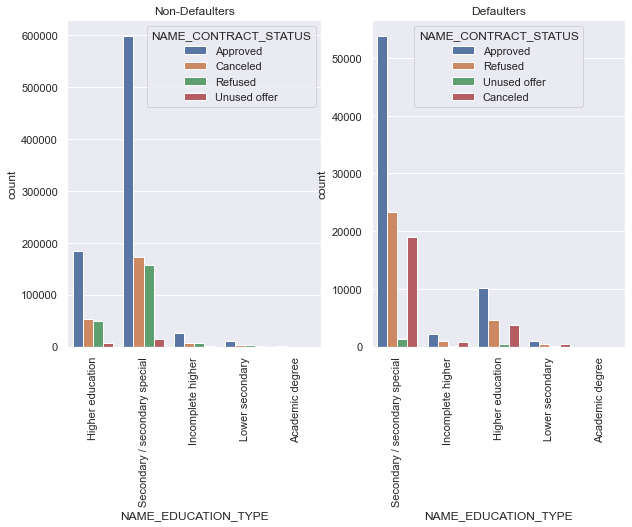

In [204]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
col = 'NAME_EDUCATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=Other_clients_com)
plt.xticks(rotation=90)


plt.subplot(1,2,2)
plt.title('Defaulters')
col = 'NAME_EDUCATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=Defaulters_com)
plt.xticks(rotation=90)
plt.show()

Observation:
* We can see that Secondary/Secondary special tend to be more defaulters.
* The most safe category here is Academic Degree.

#### NAME_CONTRACT_STATUS vs ORGANIZATION_TYPE

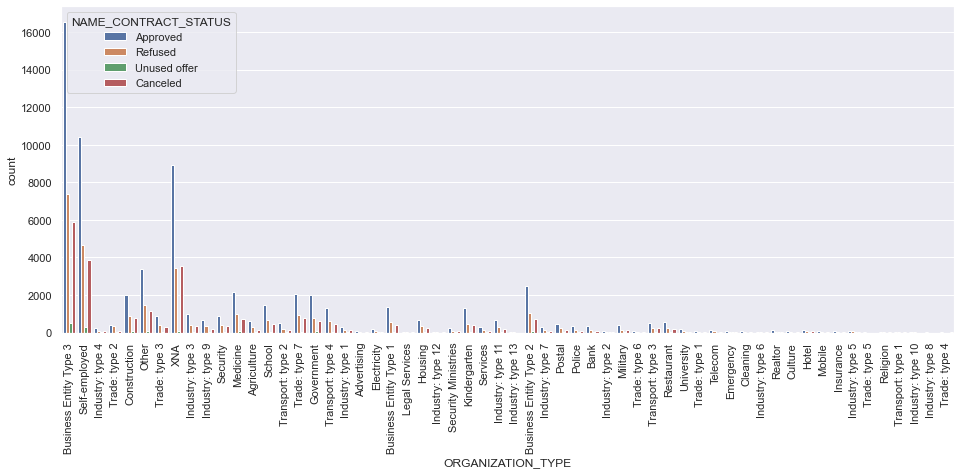

In [205]:
plt.figure(figsize=(16,6))
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=Defaulters_com)
plt.xticks(rotation=90)
plt.show()

Observation:
* Business Entity Type 3 and Self-employed people tend to default more.
* Here again XNA number of values are considerably high.

#### NAME_FAMILY_STATUS'vs 'NAME_CONTRACT_STATUS'

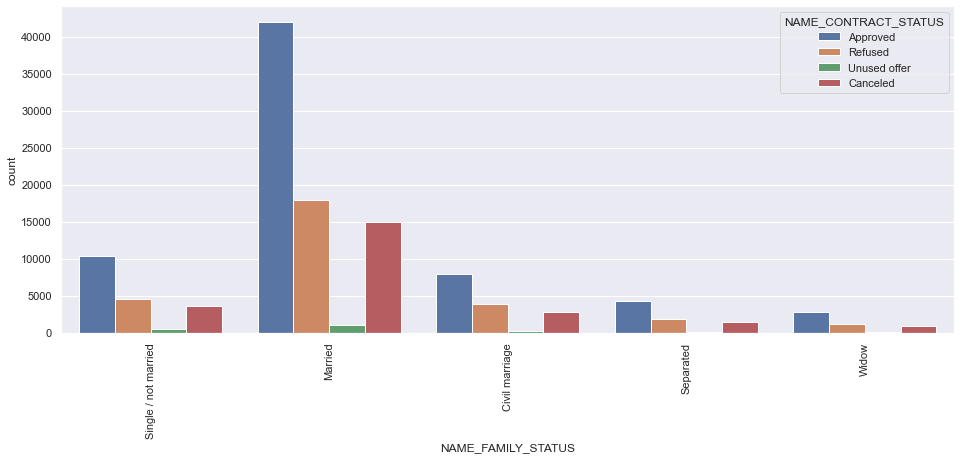

In [217]:
plt.figure(figsize=(16,6))
col1 = 'NAME_FAMILY_STATUS'
hue1 = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col1, hue=hue1, data=Defaulters_com)
plt.xticks(rotation=90)
plt.show()

Observation:
* We can see that married people have more chances of defaulting loans as compared to single people maybe becuse of family responsibilies and expenses.

We have recorded all the observations along with the analysis graphs. Thanks.